In [1]:
import pandas as pd
df = pd.read_csv("politeness_score.csv")

In [2]:
# filtering CB and VB data on previous bot
#filtered_df = df[~df["Initials"].isin(["CB", "VB"])]


filtered_df = df[
    (~df["Initials"].isin(["CB", "VB"])) &
    (~df["Type_interraction"].isin(["Problem", "I'm done"]))
]


# manipulation check: is test bot more polite than control bot? 

/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/440267204.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


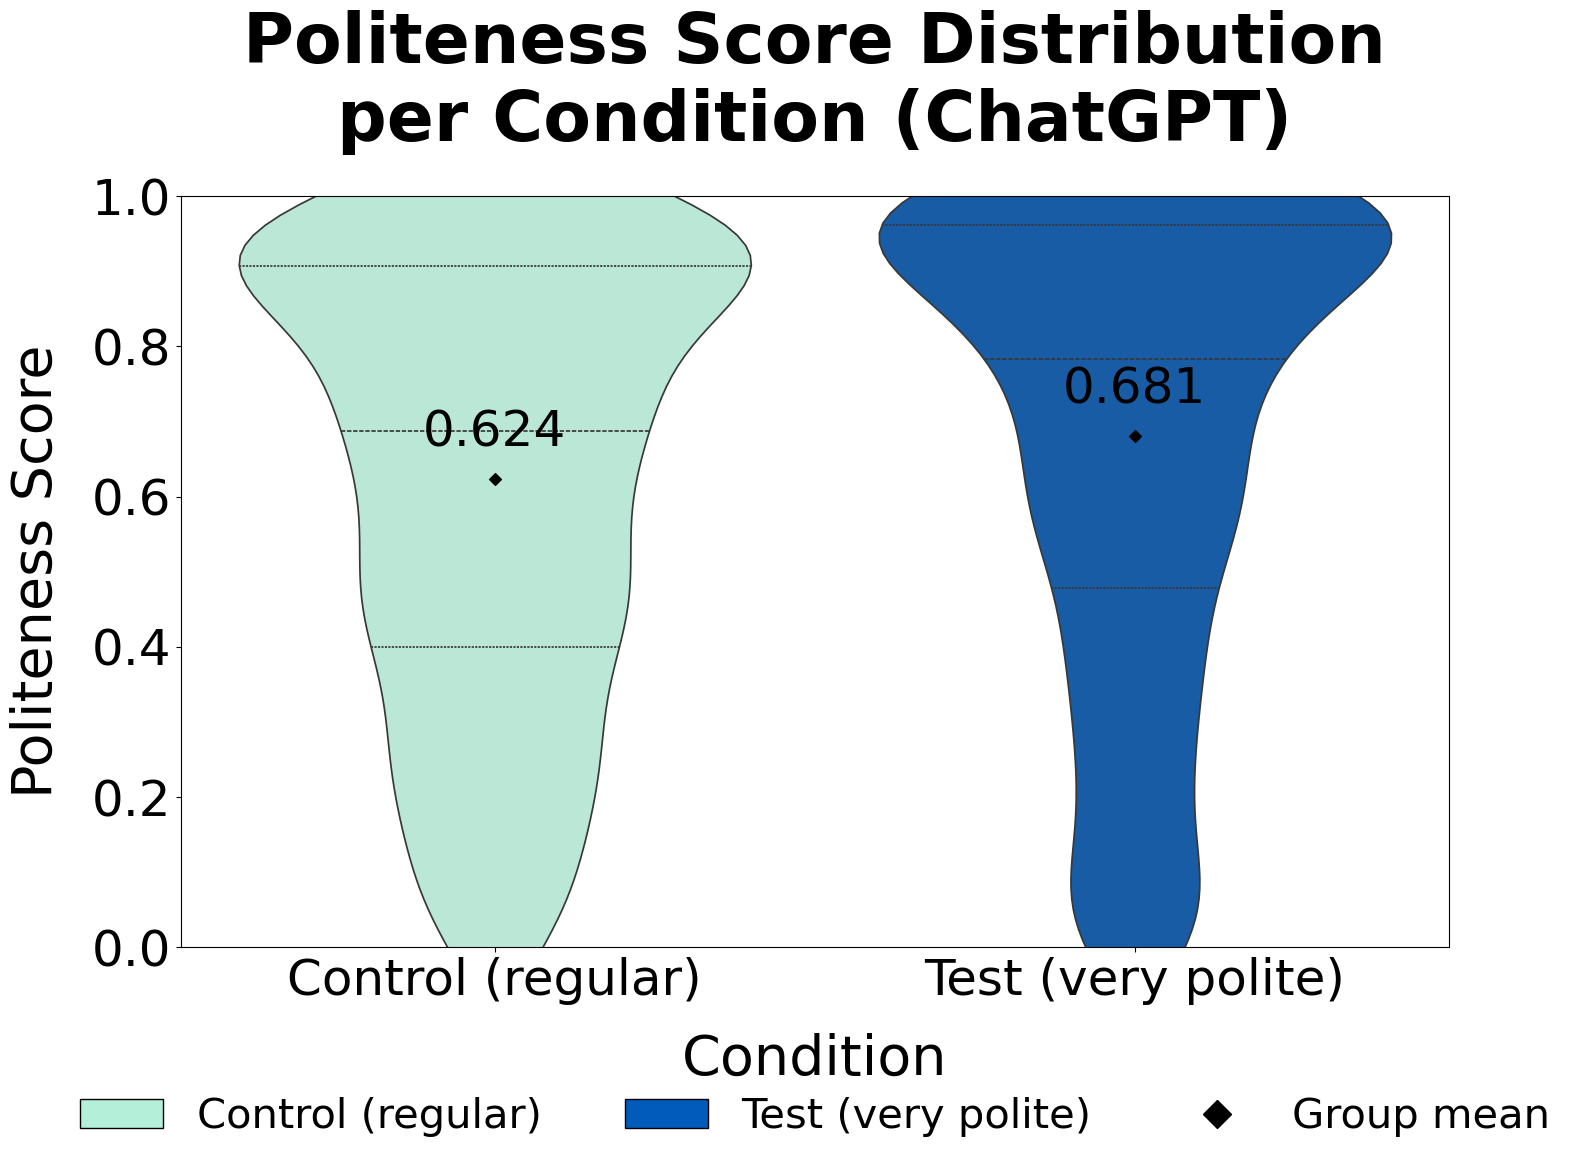

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_palette = {"C": "#B3EFD9", "T": "#005BBB"}  #  #B3E2F0 Light blue for Control, Dark blue for Test

plt.figure(figsize=(16, 12))

# Filter for ChatGPT
chatgpt_df = filtered_df[filtered_df["speaker"] == "ChatGPT"]

# Violin plot
sns.violinplot(
    data=chatgpt_df,
    x="Condition",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    inner="quartile",
    palette=custom_palette,
    order=["C", "T"]
)

# Overlay group means with markers and labels
group_means = chatgpt_df.groupby("Condition")["politeness_score_Genius1237/xlm-roberta-large-tydip"].mean()
for i, condition in enumerate(["C", "T"]):
    mean_val = group_means[condition]
    plt.scatter(i, mean_val, color='black', marker='D', label='Mean' if i == 0 else "")
    plt.text(i, mean_val + 0.03, f"{mean_val:.3f}", ha='center', va='bottom', fontsize=36, color='black')

# Titles and labels with large fonts
plt.title("Politeness Score Distribution\nper Condition (ChatGPT)", fontsize=50, weight='bold',pad=40)
plt.xlabel("Condition", fontsize=40, labelpad=20)
plt.ylabel("Politeness Score", fontsize=40, labelpad=20)
plt.xticks([0, 1], ["Control (regular)", "Test (very polite)"], fontsize=36)
plt.yticks(fontsize=36)
plt.ylim(0, 1)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)'),
    plt.Line2D([0], [0], marker='D', color='black', label='Group mean', markersize=14, linestyle='None')
]
plt.legend(
    handles=legend_elements,
    fontsize=30,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # x=centered, y=below the plot
    ncol=3,                       # items in a single row
    frameon=False
)

plt.tight_layout()
plt.show()

## graph manipulation check

/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/1407659410.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


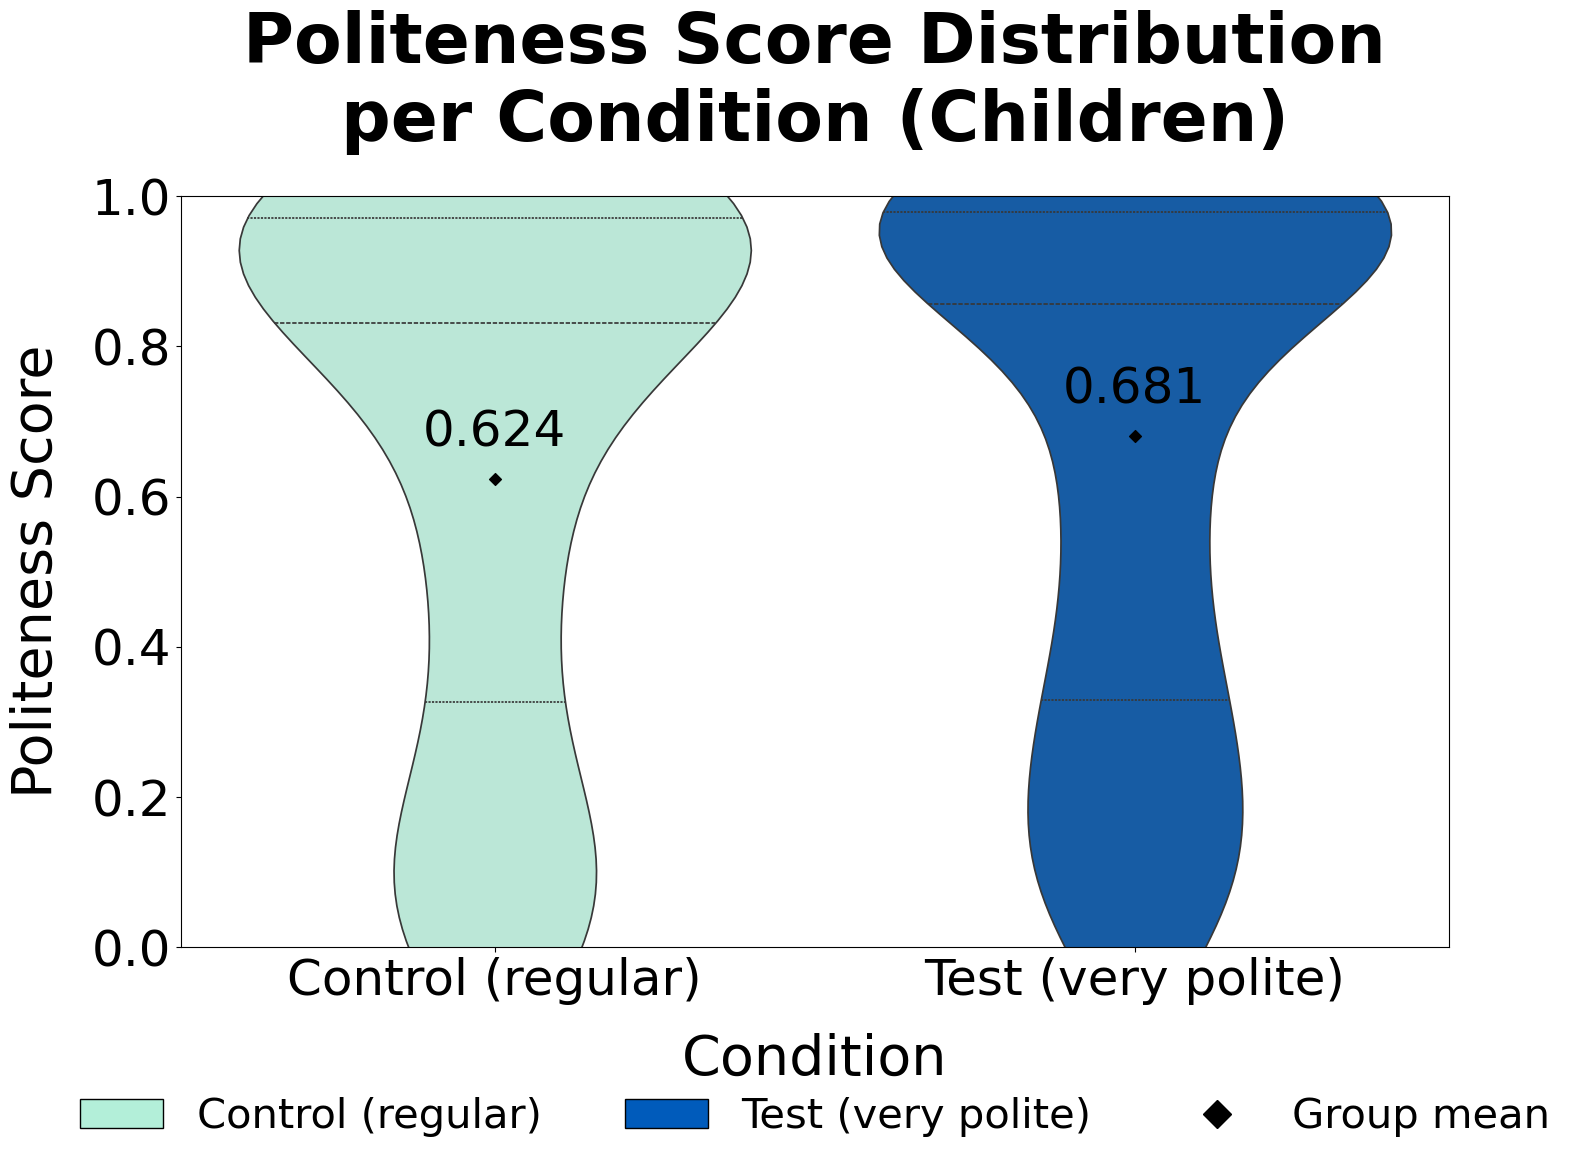

In [4]:
# manipulation check: is test bot more polite than control bot? 
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_palette = {"C": "#B3EFD9", "T": "#005BBB"}  #  #B3E2F0 Light blue for Control, Dark blue for Test

plt.figure(figsize=(16, 12))

# Filter for ChatGPT
kids_df = filtered_df[filtered_df["speaker"] == "You"]

# Violin plot
sns.violinplot(
    data=kids_df,
    x="Condition",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    inner="quartile",
    palette=custom_palette,
    order=["C", "T"]
)

# Overlay group means with markers and labels
group_means = chatgpt_df.groupby("Condition")["politeness_score_Genius1237/xlm-roberta-large-tydip"].mean()
for i, condition in enumerate(["C", "T"]):
    mean_val = group_means[condition]
    plt.scatter(i, mean_val, color='black', marker='D', label='Mean' if i == 0 else "")
    plt.text(i, mean_val + 0.03, f"{mean_val:.3f}", ha='center', va='bottom', fontsize=36, color='black')

# Titles and labels with large fonts
plt.title("Politeness Score Distribution\nper Condition (Children)", fontsize=50, weight='bold',pad=40)
plt.xlabel("Condition", fontsize=40, labelpad=20)
plt.ylabel("Politeness Score", fontsize=40, labelpad=20)
plt.xticks([0, 1], ["Control (regular)", "Test (very polite)"], fontsize=36)
plt.yticks(fontsize=36)
plt.ylim(0, 1)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)'),
    plt.Line2D([0], [0], marker='D', color='black', label='Group mean', markersize=14, linestyle='None')
]
plt.legend(
    handles=legend_elements,
    fontsize=30,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # x=centered, y=below the plot
    ncol=3,                       # items in a single row
    frameon=False
)

plt.tight_layout()
plt.show()

## statistical analysis manipulation check

In [5]:
# statistical analysis : how much more polite is chatGPT in test condition vs control condition?
import pandas as pd
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu


# Get politeness scores per condition
scores_T = chatgpt_df[chatgpt_df["Condition"] == "T"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
scores_C = chatgpt_df[chatgpt_df["Condition"] == "C"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

# Compute means and difference
mean_T = scores_T.mean()
mean_C = scores_C.mean()
diff = mean_T - mean_C

print(f"\n📊 Mean politeness score:")
print(f"  Test (T):    {mean_T:.3f}")
print(f"  Control (C): {mean_C:.3f}")
print(f"  ➤ Difference: {diff:.3f}")

# --- Assumption checks ---
print("\n🔍 Assumption checks:")

# Shapiro-Wilk tests for normality
shapiro_T = shapiro(scores_T)
shapiro_C = shapiro(scores_C)
print(f"  Shapiro-Wilk (T): p = {shapiro_T.pvalue:.3f}")
print(f"  Shapiro-Wilk (C): p = {shapiro_C.pvalue:.3f}")

# Levene’s test for equal variance
levene_test = levene(scores_T, scores_C)
print(f"  Levene's test for equal variances: p = {levene_test.pvalue:.3f}")

# --- Statistical test ---
print("\n📈 Statistical test result:")
if shapiro_T.pvalue > 0.05 and shapiro_C.pvalue > 0.05 and levene_test.pvalue > 0.05:
    # Use t-test
    t_stat, p_val = ttest_ind(scores_T, scores_C, equal_var=True)
    test_used = "Independent t-test (equal variances)"
else:
    # Use Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(scores_T, scores_C, alternative='two-sided')
    test_used = "Mann–Whitney U test (non-parametric)"
    # Rank biserial correlation as effect size
    n1, n2 = len(scores_T), len(scores_C)
    rank_biserial = 1 - (2 * u_stat) / (n1 * n2)
    effect_size = rank_biserial
    

print(f"  {test_used}: p = {p_val:.6f}")
if p_val < 0.05:
    print("  ✅ The difference is statistically significant.")
else:
    print("  ❌ The difference is not statistically significant.")
print(f"     Effect size (rank biserial): {rank_biserial:.3f}")


📊 Mean politeness score:
  Test (T):    0.681
  Control (C): 0.624
  ➤ Difference: 0.057

🔍 Assumption checks:
  Shapiro-Wilk (T): p = 0.000
  Shapiro-Wilk (C): p = 0.000
  Levene's test for equal variances: p = 0.956

📈 Statistical test result:
  Mann–Whitney U test (non-parametric): p = 0.000004
  ✅ The difference is statistically significant.
     Effect size (rank biserial): -0.157


# are kids more polite with a polite ai bot?

## graph kids

/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/2736996117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


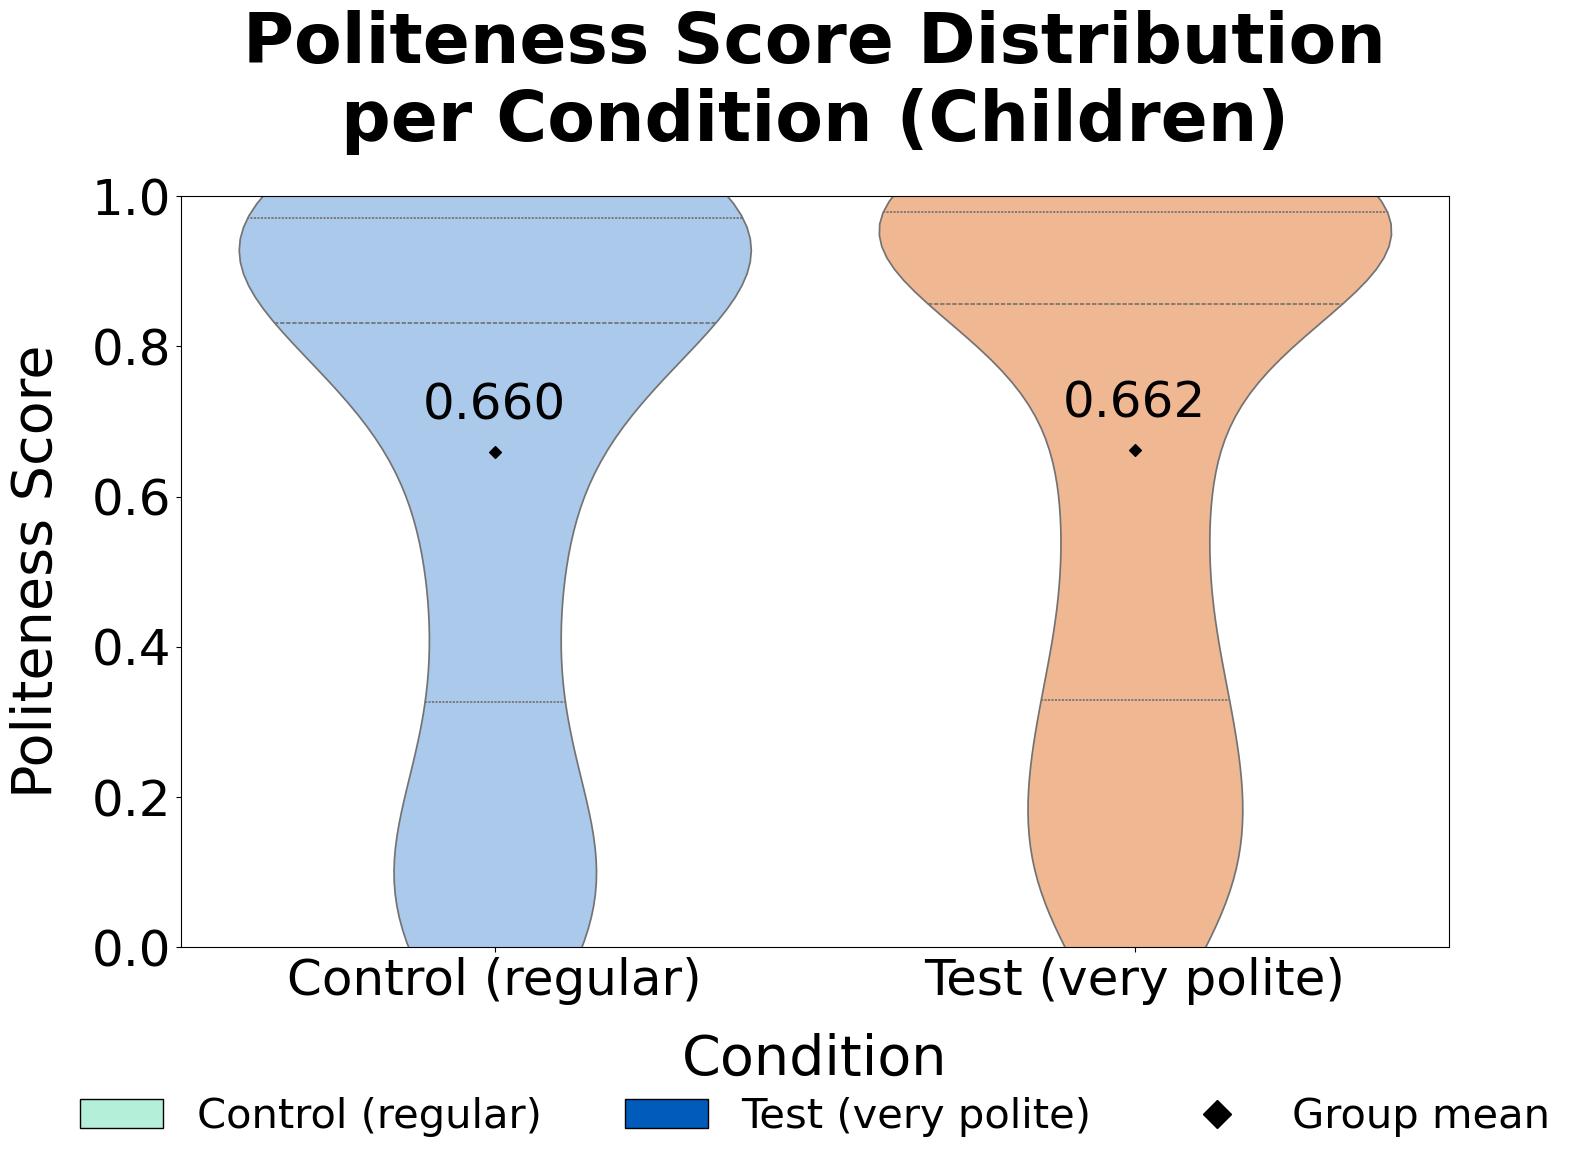

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))

# Filter for ChatGPT
kids_df = filtered_df[filtered_df["speaker"] == "You"]

# Violin plot
sns.violinplot(
    data=kids_df,
    x="Condition",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    inner="quartile",
    palette="pastel",
    order=["C", "T"]
)

# Overlay group means with markers and labels
group_means = kids_df.groupby("Condition")["politeness_score_Genius1237/xlm-roberta-large-tydip"].mean()
for i, condition in enumerate(["C", "T"]):
    mean_val = group_means[condition]
    plt.scatter(i, mean_val, color='black', marker='D', label='Mean' if i == 0 else "")
    plt.text(i, mean_val + 0.03, f"{mean_val:.3f}", ha='center', va='bottom', fontsize=36, color='black')

# Titles and labels with large fonts
plt.title("Politeness Score Distribution\nper Condition (Children)", fontsize=50, weight='bold',pad=40)
plt.xlabel("Condition", fontsize=40, labelpad=20)
plt.ylabel("Politeness Score", fontsize=40, labelpad=20)
plt.xticks([0, 1], ["Control (regular)", "Test (very polite)"], fontsize=36)
plt.yticks(fontsize=36)
plt.ylim(0, 1)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)'),
    plt.Line2D([0], [0], marker='D', color='black', label='Group mean', markersize=14, linestyle='None')
]
plt.legend(
    handles=legend_elements,
    fontsize=30,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # x=centered, y=below the plot
    ncol=3,                       # items in a single row
    frameon=False
)

plt.tight_layout()
plt.show()

## stat kids

In [7]:
# statistical analysis for children

# Get politeness scores per condition
scores_T = kids_df[kids_df["Condition"] == "T"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
scores_C = kids_df[kids_df["Condition"] == "C"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

# Compute means and difference
mean_T = scores_T.mean()
mean_C = scores_C.mean()
diff = mean_T - mean_C

print(f"\n📊 Mean politeness score:")
print(f"  Test (T):    {mean_T:.3f}")
print(f"  Control (C): {mean_C:.3f}")
print(f"  ➤ Difference: {diff:.3f}")

# --- Assumption checks ---
print("\n🔍 Assumption checks:")

# Shapiro-Wilk tests for normality
shapiro_T = shapiro(scores_T)
shapiro_C = shapiro(scores_C)
print(f"  Shapiro-Wilk (T): p = {shapiro_T.pvalue:.3f}")
print(f"  Shapiro-Wilk (C): p = {shapiro_C.pvalue:.3f}")

# Levene’s test for equal variance
levene_test = levene(scores_T, scores_C)
print(f"  Levene's test for equal variances: p = {levene_test.pvalue:.3f}")

# --- Statistical test ---
print("\n📈 Statistical test result:")
if shapiro_T.pvalue > 0.05 and shapiro_C.pvalue > 0.05 and levene_test.pvalue > 0.05:
    # Use t-test
    t_stat, p_val = ttest_ind(scores_T, scores_C, equal_var=True)
    test_used = "Independent t-test (equal variances)"
else:
    # Use Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(scores_T, scores_C, alternative='two-sided')
    test_used = "Mann–Whitney U test (non-parametric)"
    # Rank biserial correlation as effect size
    n1, n2 = len(scores_T), len(scores_C)
    rank_biserial = 1 - (2 * u_stat) / (n1 * n2)
    effect_size = rank_biserial
    

print(f"  {test_used}: p = {p_val:.6f}")
if p_val < 0.05:
    print("  ✅ The difference is statistically significant.")
else:
    print("  ❌ The difference is not statistically significant.")
print(f"     Effect size (rank biserial): {rank_biserial:.3f}")


📊 Mean politeness score:
  Test (T):    0.662
  Control (C): 0.660
  ➤ Difference: 0.002

🔍 Assumption checks:
  Shapiro-Wilk (T): p = 0.000
  Shapiro-Wilk (C): p = 0.000
  Levene's test for equal variances: p = 0.719

📈 Statistical test result:
  Mann–Whitney U test (non-parametric): p = 0.814858
  ❌ The difference is not statistically significant.
     Effect size (rank biserial): -0.016


## without AG

/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/1644768435.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/1644768435.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = kids_noAG_df.groupby("Condition")["politeness_score_Genius1237/xlm-roberta-large-tydip"].mean()


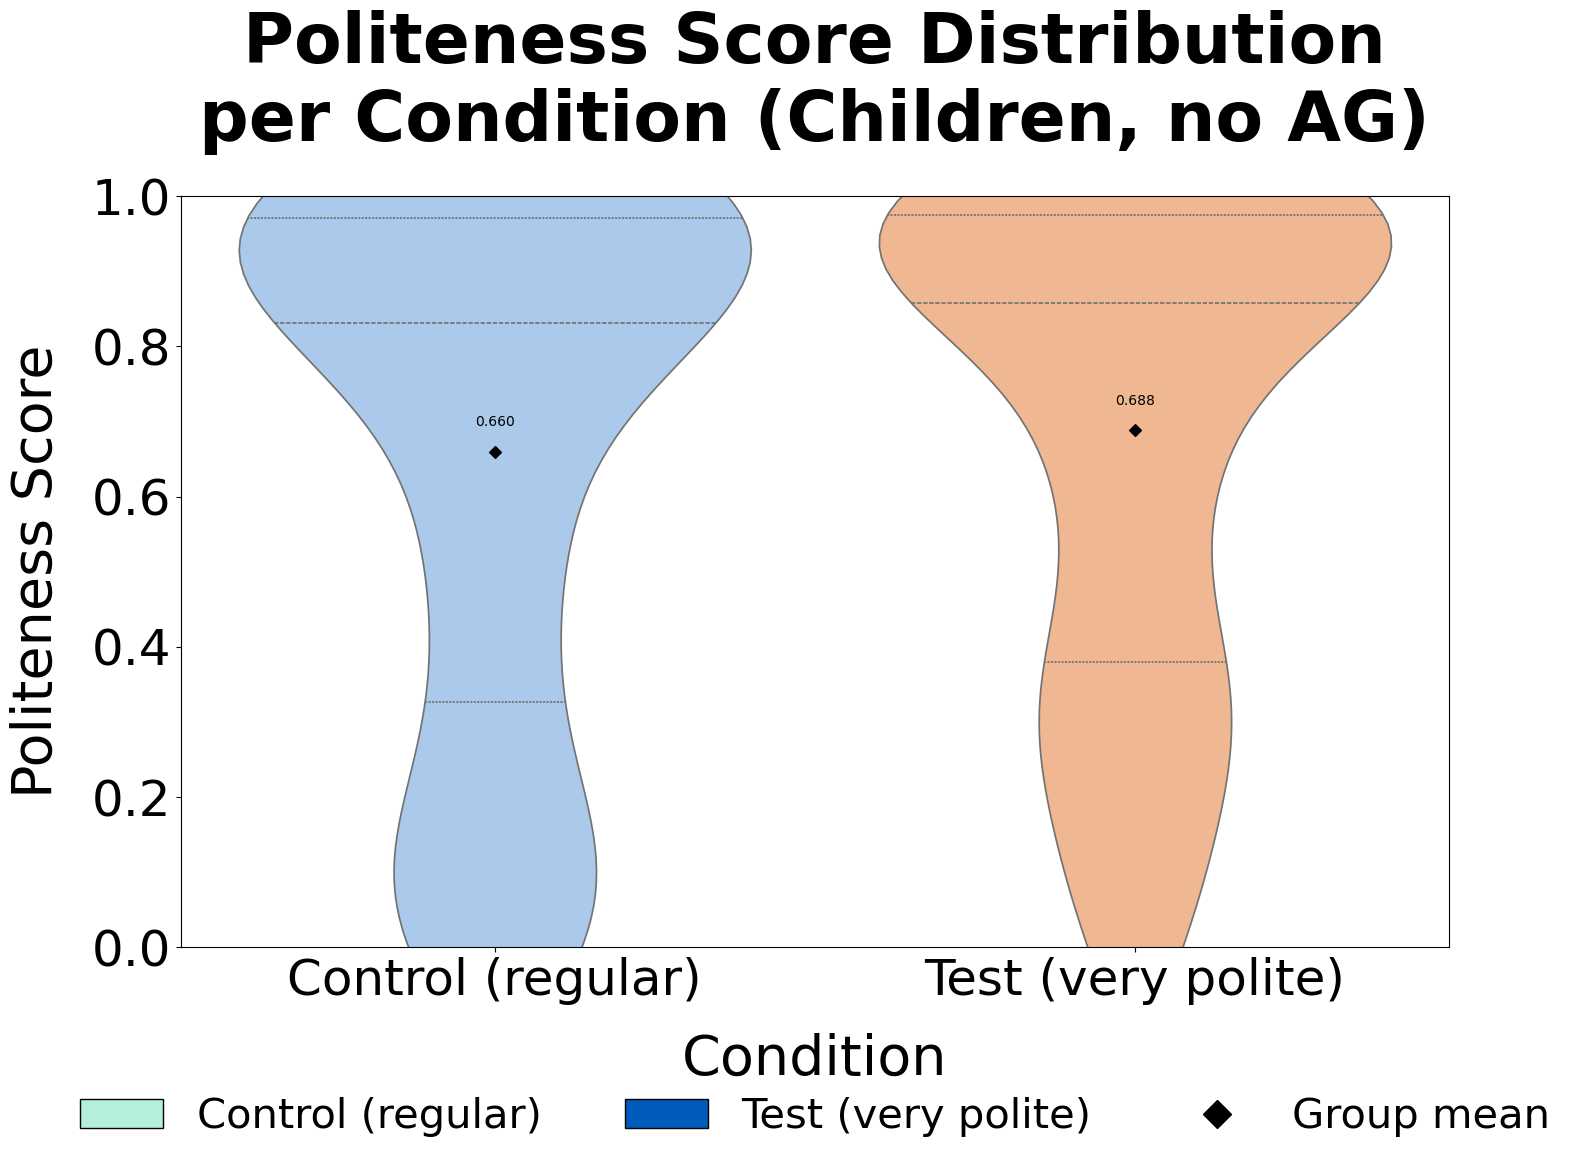

In [37]:
# analysis without AG
noAG_df = df[~df["Initials"].isin(["AG"])]

plt.figure(figsize=(16, 12))

# Filter for ChatGPT
kids_noAG_df = noAG_df[noAG_df["speaker"] == "You"]

# Violin plot
sns.violinplot(
    data=kids_noAG_df,
    x="Condition",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    inner="quartile",
    palette="pastel",
    order=["C", "T"]
)

# Overlay group means with markers and labels
group_means = kids_noAG_df.groupby("Condition")["politeness_score_Genius1237/xlm-roberta-large-tydip"].mean()
for i, condition in enumerate(["C", "T"]):
    mean_val = group_means[condition]
    plt.scatter(i, mean_val, color='black', marker='D', label='Mean' if i == 0 else "")
    plt.text(i, mean_val + 0.03, f"{mean_val:.3f}", ha='center', va='bottom', fontsize=10, color='black')

# Titles and labels with large fonts
plt.title("Politeness Score Distribution\nper Condition (Children, no AG)", fontsize=50, weight='bold',pad=40)
plt.xlabel("Condition", fontsize=40, labelpad=20)
plt.ylabel("Politeness Score", fontsize=40, labelpad=20)
plt.xticks([0, 1], ["Control (regular)", "Test (very polite)"], fontsize=36)
plt.yticks(fontsize=36)
plt.ylim(0, 1)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)'),
    plt.Line2D([0], [0], marker='D', color='black', label='Group mean', markersize=14, linestyle='None')
]
plt.legend(
    handles=legend_elements,
    fontsize=30,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # x=centered, y=below the plot
    ncol=3,                       # items in a single row
    frameon=False
)

plt.tight_layout()
plt.show()

# controls

## per task type

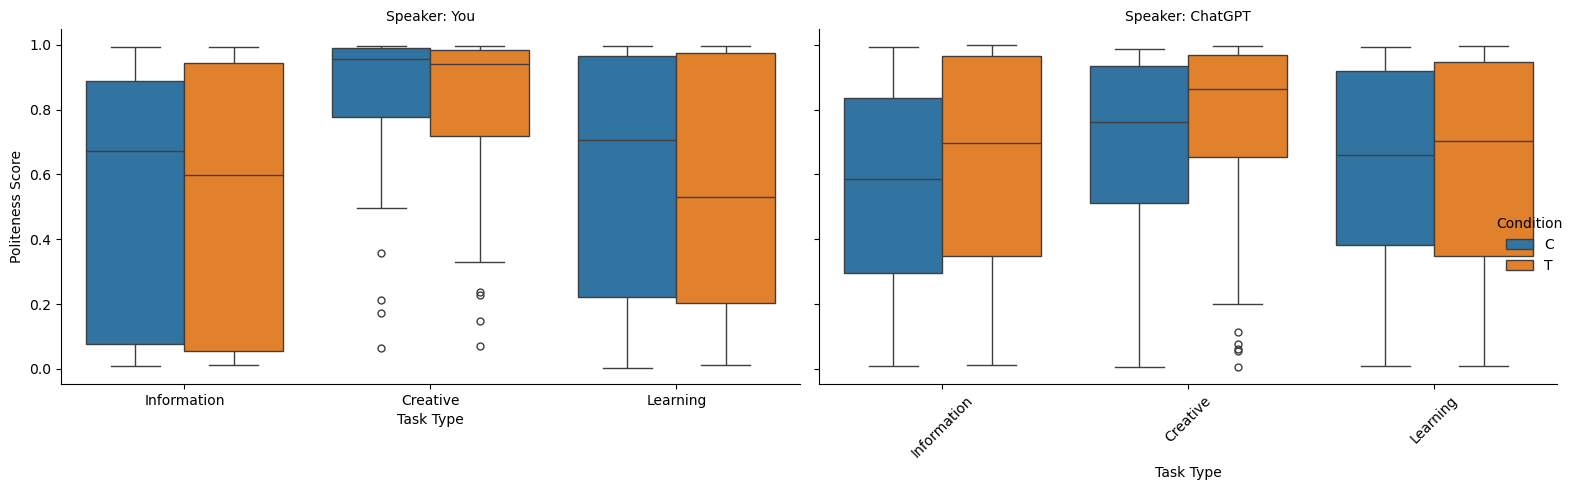

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=filtered_df,
    x="task_type",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    col="speaker",
    kind="box",
    height=5,
    aspect=1.5
)
g.set_titles("Speaker: {col_name}")
g.set_axis_labels("Task Type", "Politeness Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## per participant

ValueError: Automatic legend placement (loc='best') not implemented for figure legend

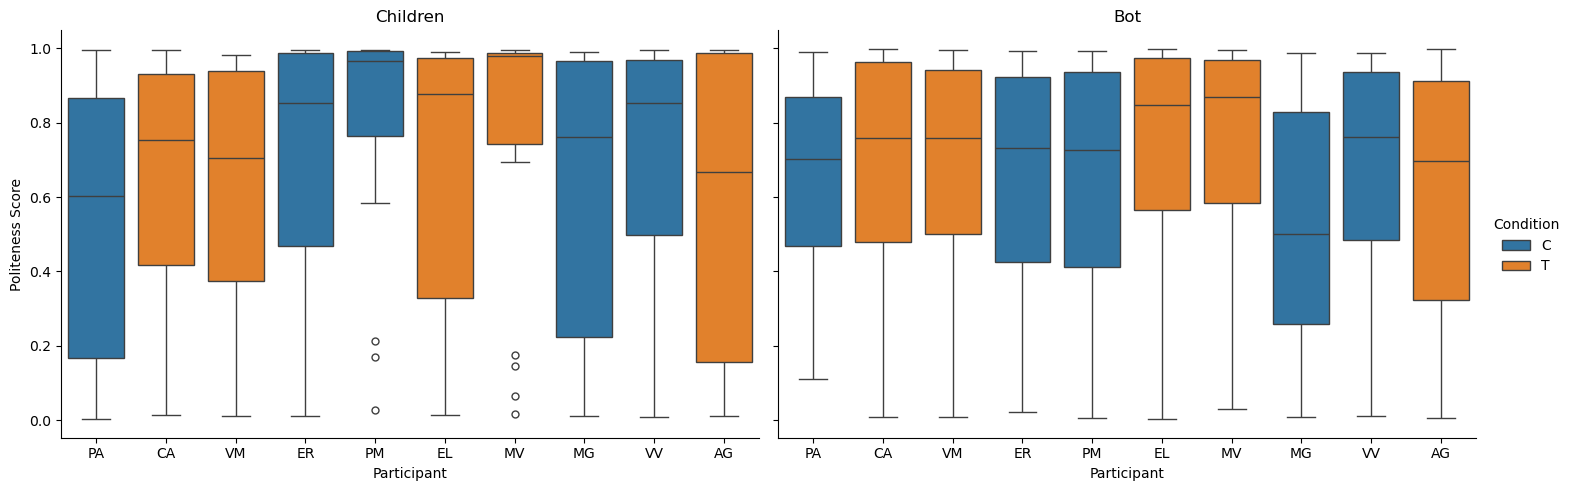

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

new_titles = {"You": "Children", "ChatGPT": "Bot"}
    
g = sns.catplot(
    data=filtered_df,
    x="Initials",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    col="speaker",
    kind="box",
    height=5,
    aspect=1.5
)

# Set custom titles
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(new_titles.get(title, title))  # DO NOT overwrite with g.set_titles()

# Axis labels and legend
g.set_axis_labels("Participant", "Politeness Score")
g._legend.set_loc("best")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## per age

ValueError: Automatic legend placement (loc='best') not implemented for figure legend

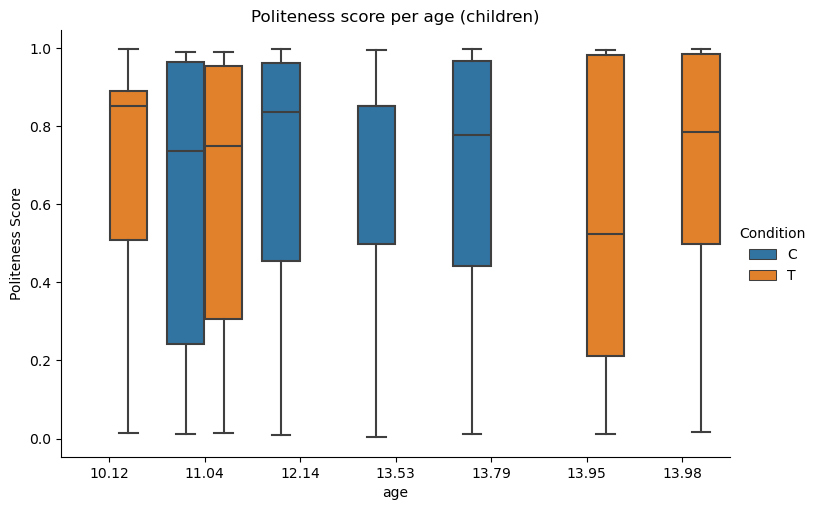

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

new_titles = {"You": "Children", "ChatGPT": "Bot"}
    
g = sns.catplot(
    data=kids_df,
    x="Age at experiment",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    kind="box",
    height=5,
    aspect=1.5
)


plt.title("Politeness score per age (children)") 

# Axis labels and legend
g.set_axis_labels("age", "Politeness Score")
g._legend.set_loc("best")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## per language of experiment

ValueError: Automatic legend placement (loc='best') not implemented for figure legend

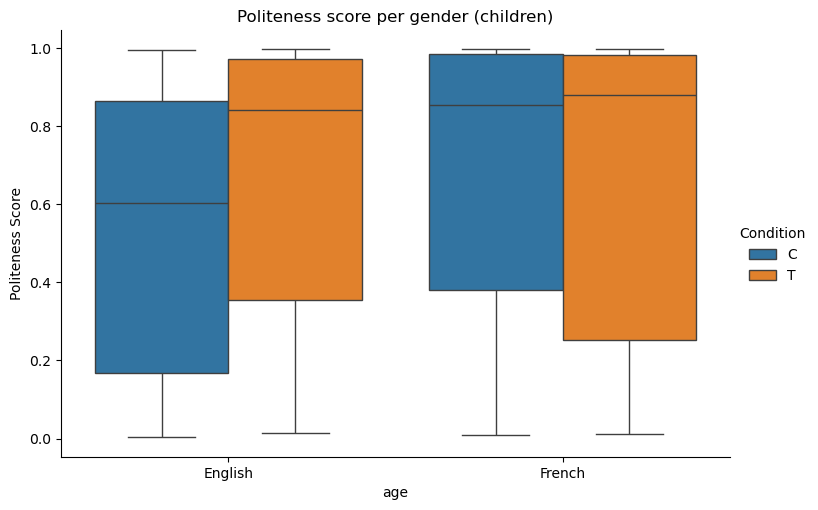

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

new_titles = {"You": "Children", "ChatGPT": "Bot"}
    
g = sns.catplot(
    data=kids_df,
    x="Language of experiment",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    kind="box",
    height=5,
    aspect=1.5
)


plt.title("Politeness score per gender (children)") 

# Axis labels and legend
g.set_axis_labels("age", "Politeness Score")
g._legend.set_loc("best")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## per order of task

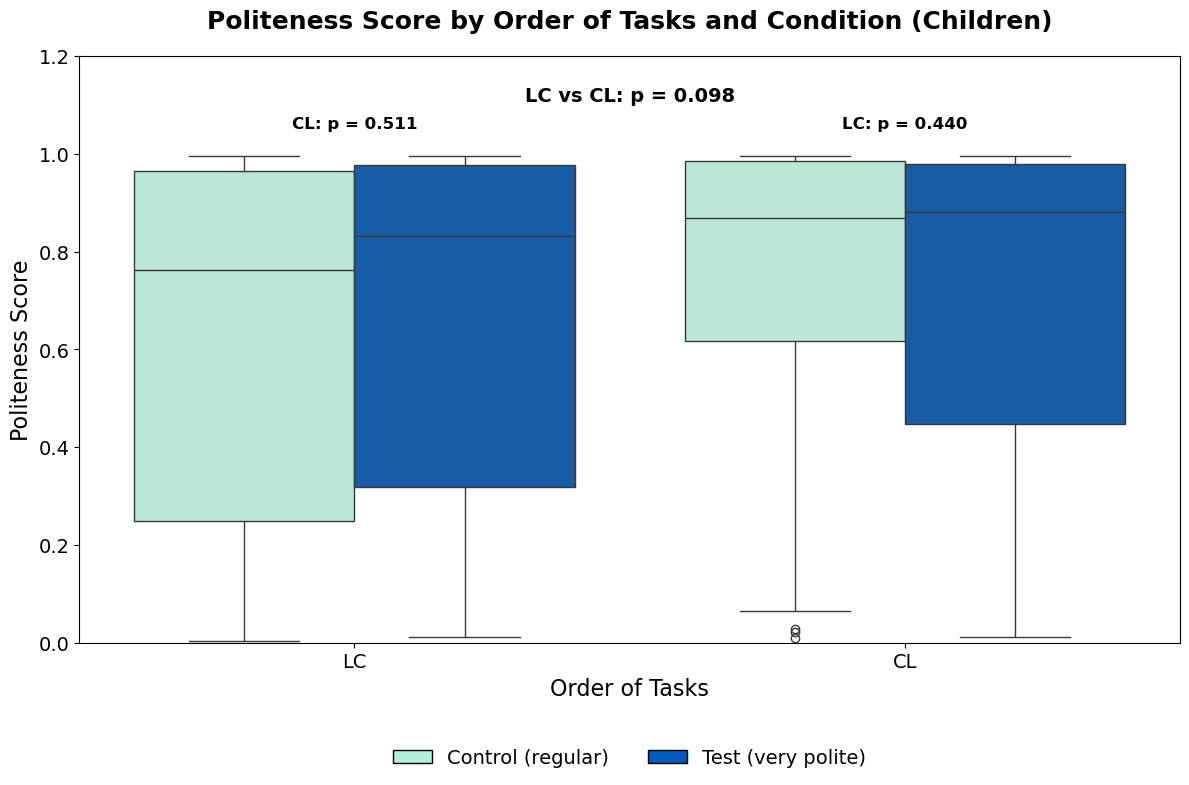

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from matplotlib.patches import Patch

# Set figure size
plt.figure(figsize=(12, 8))  # adjust as needed

# Custom color palette
custom_palette = {"C": "#B3EFD9", "T": "#005BBB"}

# Create boxplot on the current Axes
ax = sns.boxplot(
    data=kids_df,
    x="Order of tasks",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    palette=custom_palette
)

# Add per-condition p-values (Control vs Test within each Order)
order_values = sorted(kids_df["Order of tasks"].dropna().unique())

for i, order in enumerate(order_values):
    subset = kids_df[kids_df["Order of tasks"] == order]
    scores_C = subset[subset["Condition"] == "C"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
    scores_T = subset[subset["Condition"] == "T"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

    if len(scores_C) > 0 and len(scores_T) > 0:
        stat, p = mannwhitneyu(scores_C, scores_T, alternative='two-sided')
        p_text = f"{order}: p = {p:.3f}" if p >= 0.001 else f"{order}: p < .001"
    else:
        p_text = f"{order}: n/a"

    max_val = max(subset["politeness_score_Genius1237/xlm-roberta-large-tydip"].max(), 0.95)
    ax.text(i, max_val + 0.05, p_text, ha='center', va='bottom', fontsize=12, weight='bold')

# Add global LC vs CL p-value
lc_scores = kids_df[kids_df["Order of tasks"] == "LC"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
cl_scores = kids_df[kids_df["Order of tasks"] == "CL"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

if len(lc_scores) > 0 and len(cl_scores) > 0:
    stat, p = mannwhitneyu(lc_scores, cl_scores, alternative='two-sided')
    p_global = f"LC vs CL: p = {p:.3f}" if p >= 0.001 else "LC vs CL: p < .001"
else:
    p_global = "LC vs CL: n/a"

# Add global p-value above LC/CL
ax.text(0.5, 1.1, p_global, ha='center', va='bottom', fontsize=14, weight='bold')

# Set labels and title
ax.set_title("Politeness Score by Order of Tasks and Condition (Children)", fontsize=18, pad=20, weight='bold')
ax.set_xlabel("Order of Tasks", fontsize=16)
ax.set_ylabel("Politeness Score", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim(0, 1.2)

# Add legend below the plot
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)')
]
ax.legend(
    handles=legend_elements,
    fontsize=14,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()


## per gender

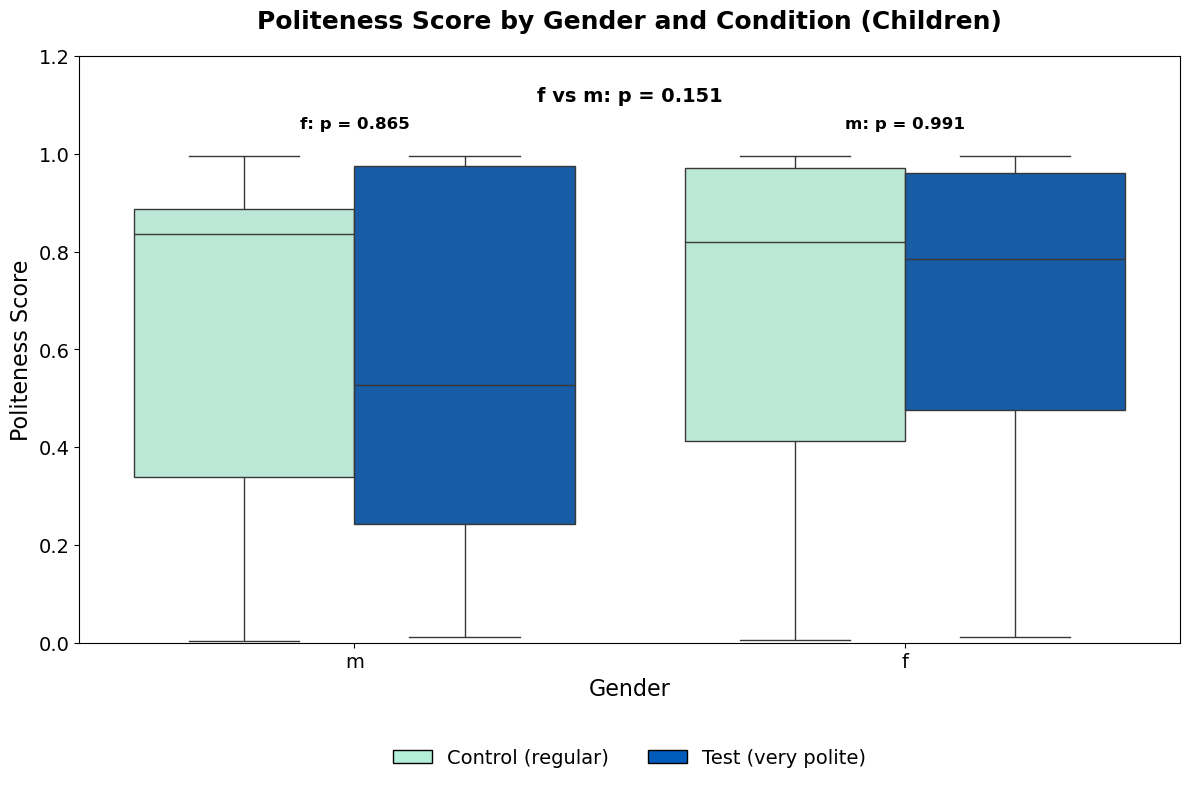

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from matplotlib.patches import Patch

# Set figure size
plt.figure(figsize=(12, 8))  # adjust as needed

# Custom color palette
custom_palette = {"C": "#B3EFD9", "T": "#005BBB"}

# Create boxplot on the current Axes
ax = sns.boxplot(
    data=kids_df,
    x="Sex",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    palette=custom_palette
)

# Add per-condition p-values (Control vs Test within each Order)
order_values = sorted(kids_df["Sex"].dropna().unique())

for i, order in enumerate(order_values):
    subset = kids_df[kids_df["Sex"] == order]
    scores_C = subset[subset["Condition"] == "C"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
    scores_T = subset[subset["Condition"] == "T"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

    if len(scores_C) > 0 and len(scores_T) > 0:
        stat, p = mannwhitneyu(scores_C, scores_T, alternative='two-sided')
        p_text = f"{order}: p = {p:.3f}" if p >= 0.001 else f"{order}: p < .001"
    else:
        p_text = f"{order}: n/a"

    max_val = max(subset["politeness_score_Genius1237/xlm-roberta-large-tydip"].max(), 0.95)
    ax.text(i, max_val + 0.05, p_text, ha='center', va='bottom', fontsize=12, weight='bold')

# Add global LC vs CL p-value
f_scores = kids_df[kids_df["Sex"] == "f"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
m_scores = kids_df[kids_df["Sex"] == "m"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

if len(f_scores) > 0 and len(m_scores) > 0:
    stat, p = mannwhitneyu(f_scores, m_scores, alternative='two-sided')
    p_global = f"f vs m: p = {p:.3f}" if p >= 0.001 else "f vs m: p < .001"
else:
    p_global = "f vs m: n/a"

# Add global p-value above LC/CL
ax.text(0.5, 1.1, p_global, ha='center', va='bottom', fontsize=14, weight='bold')

# Set labels and title
ax.set_title("Politeness Score by Gender and Condition (Children)", fontsize=18, pad=20, weight='bold')
ax.set_xlabel("Gender", fontsize=16)
ax.set_ylabel("Politeness Score", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim(0, 1.2)

# Add legend below the plot
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)')
]
ax.legend(
    handles=legend_elements,
    fontsize=14,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()


## per experimenter

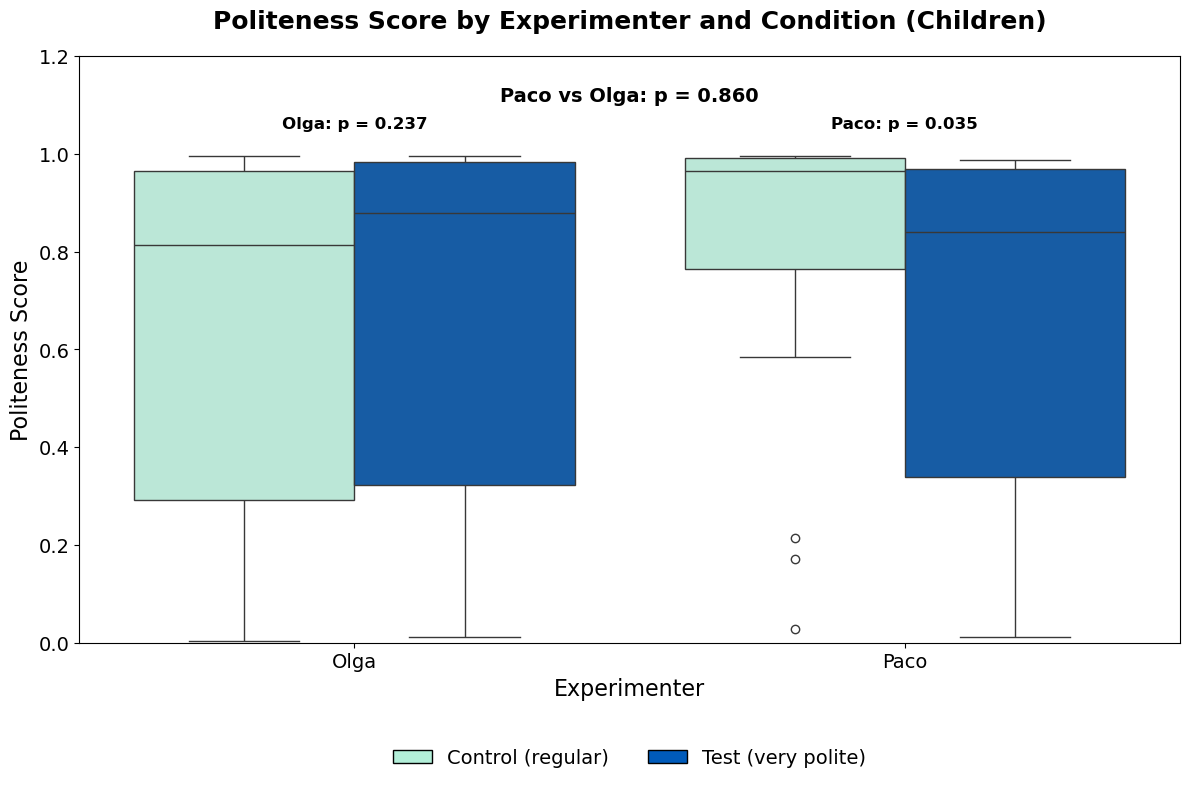

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from matplotlib.patches import Patch

# Set figure size
plt.figure(figsize=(12, 8))  # adjust as needed

# Custom color palette
custom_palette = {"C": "#B3EFD9", "T": "#005BBB"}

# Create boxplot on the current Axes
ax = sns.boxplot(
    data=kids_df,
    x="Experimenter",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    palette=custom_palette
)

# Add per-condition p-values (Control vs Test within each Order)
order_values = sorted(kids_df["Experimenter"].dropna().unique())

for i, order in enumerate(order_values):
    subset = kids_df[kids_df["Experimenter"] == order]
    scores_C = subset[subset["Condition"] == "C"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
    scores_T = subset[subset["Condition"] == "T"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

    if len(scores_C) > 0 and len(scores_T) > 0:
        stat, p = mannwhitneyu(scores_C, scores_T, alternative='two-sided')
        p_text = f"{order}: p = {p:.3f}" if p >= 0.001 else f"{order}: p < .001"
    else:
        p_text = f"{order}: n/a"

    max_val = max(subset["politeness_score_Genius1237/xlm-roberta-large-tydip"].max(), 0.95)
    ax.text(i, max_val + 0.05, p_text, ha='center', va='bottom', fontsize=12, weight='bold')

# Add global LC vs CL p-value
Paco_scores = kids_df[kids_df["Experimenter"] == "Paco"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
Olga_scores = kids_df[kids_df["Experimenter"] == "Olga"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

if len(Paco_scores) > 0 and len(Olga_scores) > 0:
    stat, p = mannwhitneyu(Paco_scores, Olga_scores, alternative='two-sided')
    p_global = f"Paco vs Olga: p = {p:.3f}" if p >= 0.001 else "Paco vs Olga: p < .001"
else:
    p_global = "Paco vs Olga: n/a"

# Add global p-value above LC/CL
ax.text(0.5, 1.1, p_global, ha='center', va='bottom', fontsize=14, weight='bold')

# Set labels and title
ax.set_title("Politeness Score by Experimenter and Condition (Children)", fontsize=18, pad=20, weight='bold')
ax.set_xlabel("Experimenter", fontsize=16)
ax.set_ylabel("Politeness Score", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim(0, 1.2)

# Add legend below the plot
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)')
]
ax.legend(
    handles=legend_elements,
    fontsize=14,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()


# effect of task type

## kruskal

In [77]:
from scipy.stats import kruskal

# Group politeness scores by task type
task_groups = [
    kids_df[kids_df["task_type"] == t]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
    for t in task_types
]

# Only include groups with data
task_groups = [g for g in task_groups if len(g) > 0]

# Perform Kruskal–Wallis test
if len(task_groups) >= 2:
    stat, p = kruskal(*task_groups)
    p_global = f"Task types: p = {p:.3f}" if p >= 0.001 else "Task types: p < .001"
else:
    p_global = "Task types: n/a"

# Display global p-value above the plot
ax.text(1, 1.12, p_global, ha='center', va='bottom', fontsize=14, weight='bold')


Text(1, 1.12, 'Task types: p < .001')

## check for AG

/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_92663/2540931619.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_92663/2540931619.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


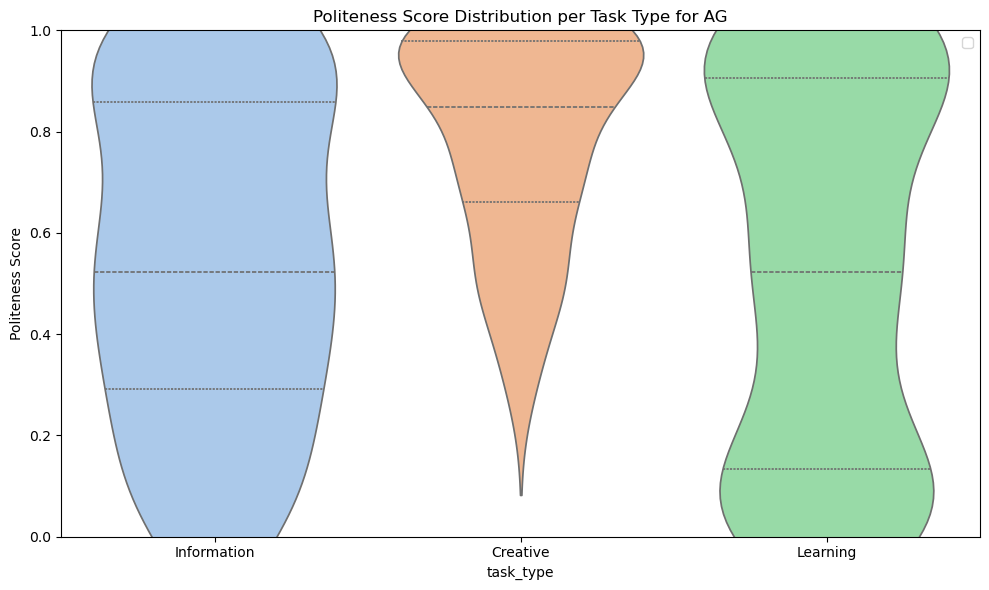

In [14]:
# manipulation check: is test bot more polite than control bot? 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Filter for AG
AG_df = filtered_df[filtered_df["Initials"] == "AG"]
# Violin plot
sns.violinplot(
    data=AG_df,
    x="task_type",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    inner="quartile",
    palette="pastel",
)

# Final touches
plt.title("Politeness Score Distribution per Task Type for AG")
plt.ylabel("Politeness Score")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


## check for PA

/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_92663/2111347049.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_92663/2111347049.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


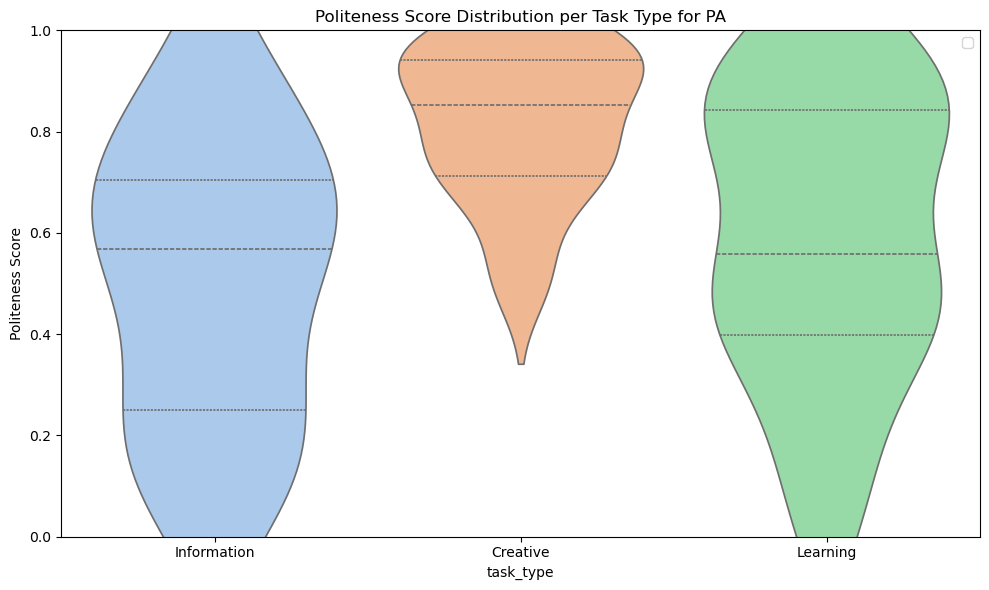

In [80]:
# manipulation check: is test bot more polite than control bot? 
import seaborn as sns
import matplotlib.pyplot as plt
kid="PA"

plt.figure(figsize=(10, 6))
# Filter for AG
kid_df = filtered_df[filtered_df["Initials"] == kid]
# Violin plot
sns.violinplot(
    data=kid_df,
    x="task_type",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    inner="quartile",
    palette="pastel",
)

# Final touches
plt.title(f"Politeness Score Distribution per Task Type for {kid}")
plt.ylabel("Politeness Score")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


## without AG

ValueError: Automatic legend placement (loc='best') not implemented for figure legend

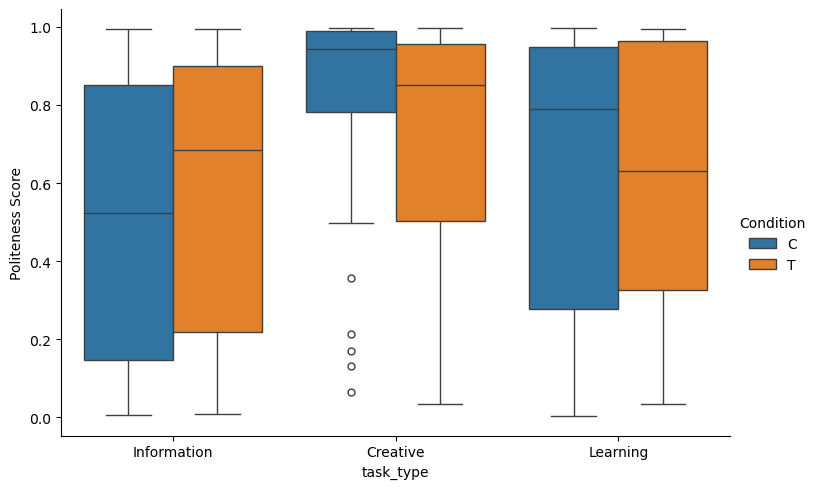

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

new_titles = {"You": "Children (no AG)"}
    
g = sns.catplot(
    data=kids_noAG_df,
    x="task_type",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    kind="box",
    height=5,
    aspect=1.5
)

# Set custom titles
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(new_titles.get(title, title))  # DO NOT overwrite with g.set_titles()

# Axis labels and legend
g.set_axis_labels("task_type", "Politeness Score")
g._legend.set_loc("best")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## graph per task type and condition

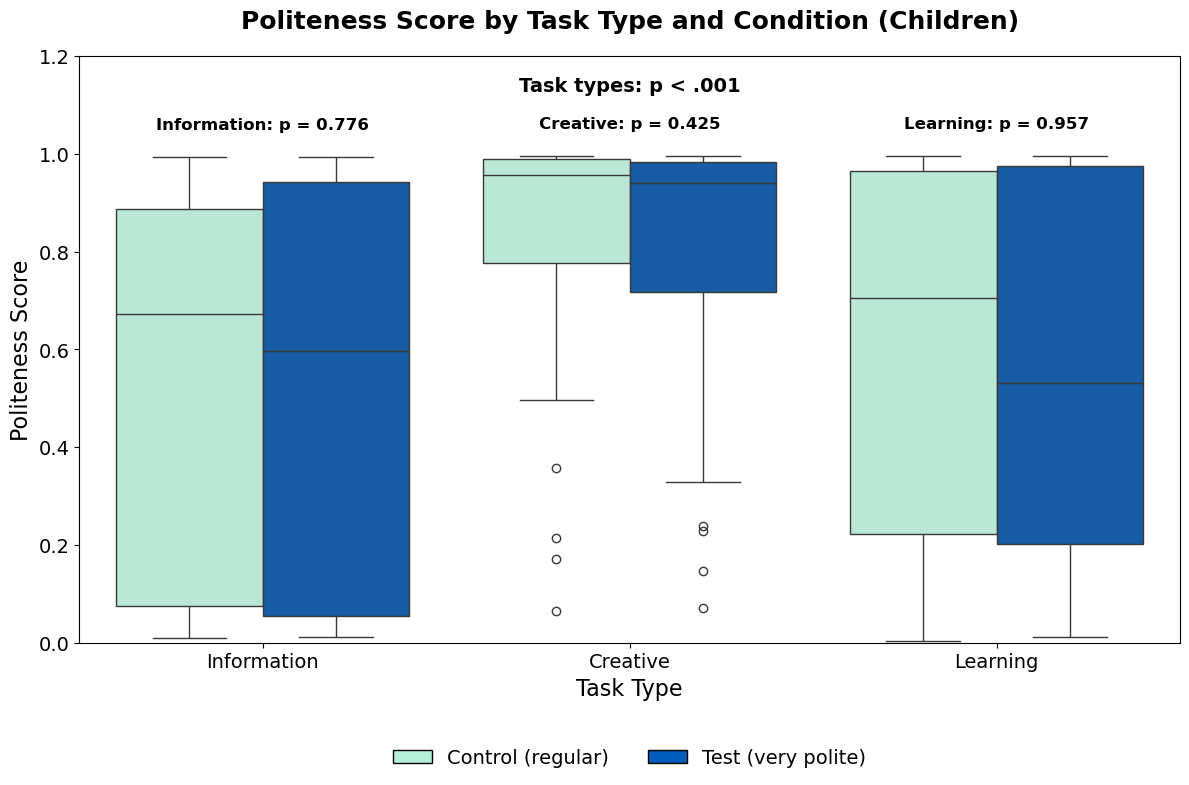

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, kruskal
from matplotlib.patches import Patch

# Set figure size
plt.figure(figsize=(12, 8))

# Custom color palette
custom_palette = {"C": "#B3EFD9", "T": "#005BBB"}

# Create boxplot grouped by task_type
ax = sns.boxplot(
    data=kids_df,
    x="task_type",
    y="politeness_score_Genius1237/xlm-roberta-large-tydip",
    hue="Condition",
    palette=custom_palette
)

# Get actual x-tick positions and labels from the plot
x_ticks = ax.get_xticks()
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Add per-task-type Mann–Whitney U p-values (Control vs Test)
for x, task in zip(x_ticks, x_labels):
    subset = kids_df[kids_df["task_type"] == task]
    scores_C = subset[subset["Condition"] == "C"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
    scores_T = subset[subset["Condition"] == "T"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

    if len(scores_C) > 0 and len(scores_T) > 0:
        stat, p = mannwhitneyu(scores_C, scores_T, alternative='two-sided')
        p_text = f"{task}: p = {p:.3f}" if p >= 0.001 else f"{task}: p < .001"
    else:
        p_text = f"{task}: n/a"

    max_val = subset["politeness_score_Genius1237/xlm-roberta-large-tydip"].max()
    ax.text(x, max_val + 0.05, p_text, ha='center', va='bottom', fontsize=12, weight='bold')

# Global Kruskal–Wallis test across all task types
task_types = sorted(kids_df["task_type"].dropna().unique())
task_groups = [
    kids_df[kids_df["task_type"] == t]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
    for t in task_types
]
task_groups = [g for g in task_groups if len(g) > 0]

if len(task_groups) >= 2:
    stat, p = kruskal(*task_groups)
    p_global = f"Task types: p = {p:.3f}" if p >= 0.001 else "Task types: p < .001"
else:
    p_global = "Task types: n/a"

# Show global p-value above the middle of the plot
center = sum(x_ticks) / len(x_ticks)
ax.text(center, 1.12, p_global, ha='center', va='bottom', fontsize=14, weight='bold')

# Final plot formatting
ax.set_title("Politeness Score by Task Type and Condition (Children)", fontsize=18, pad=20, weight='bold')
ax.set_xlabel("Task Type", fontsize=16)
ax.set_ylabel("Politeness Score", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim(0, 1.2)

# Add legend below
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)')
]
ax.legend(
    handles=legend_elements,
    fontsize=14,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()


In [88]:
# Group by task_type and Condition, then sum Manual Coding
sum_table = kids_df.groupby(["task_type", "Condition"])["Manual Coding"].sum().reset_index()

print(sum_table)


     task_type Condition  Manual Coding
0     Creative         C           20.0
1     Creative         T           35.0
2  Information         C            7.0
3  Information         T           11.0
4     Learning         C           14.0
5     Learning         T           32.0


In [87]:
print(kids_df["Manual Coding"].describe())



count    104.000000
mean       1.144231
std        0.449774
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: Manual Coding, dtype: float64


In [51]:
p

np.float64(8.235003069720181e-08)

In [ ]:
# Get actual x-axis positions and labels from the axis
x_positions = [tick.get_position()[0] for tick in ax.patches if tick.get_y() == 0]
x_labels = [t.get_text() for t in ax.get_xticklabels()]
seen = set()
x_indices = [i for i, lbl in enumerate(x_labels) if not (lbl in seen or seen.add(lbl))]

# Add per-task-type Mann–Whitney U p-values (Control vs Test)
for idx, task in zip(x_indices, x_labels):
    subset = kids_df[kids_df["task_type"] == task]
    scores_C = subset[subset["Condition"] == "C"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]
    scores_T = subset[subset["Condition"] == "T"]["politeness_score_Genius1237/xlm-roberta-large-tydip"]

    if len(scores_C) > 0 and len(scores_T) > 0:
        stat, p = mannwhitneyu(scores_C, scores_T, alternative='two-sided')
        p_text = f"{task}: p = {p:.3f}" if p >= 0.001 else f"{task}: p < .001"
    else:
        p_text = f"{task}: n/a"

    max_val = max(subset["politeness_score_Genius1237/xlm-roberta-large-tydip"].max(), 0.95)
    ax.text(idx, max_val + 0.05, p_text, ha='center', va='bottom', fontsize=12, weight='bold')


In [55]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.6 MB/s eta 0:00:00a 0:00:01


## anova

In [58]:

# Rename column for easier use (optional)
kids_df = kids_df.rename(columns={
    'politeness_score_Genius1237/xlm-roberta-large-tydip': 'politeness_score'
})

from statsmodels.formula.api import ols
import statsmodels.api as sm

# Fit model with main effects and interaction
model = ols('politeness_score ~ task_type * Condition', data=kids_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq     df          F        PR(>F)
task_type             3.913947    2.0  18.664017  1.827208e-08
Condition             0.219656    1.0   2.094898  1.486011e-01
task_type:Condition   0.207351    2.0   0.988773  3.729707e-01
Residual             40.578014  387.0        NaN           NaN


## graph on manual coding

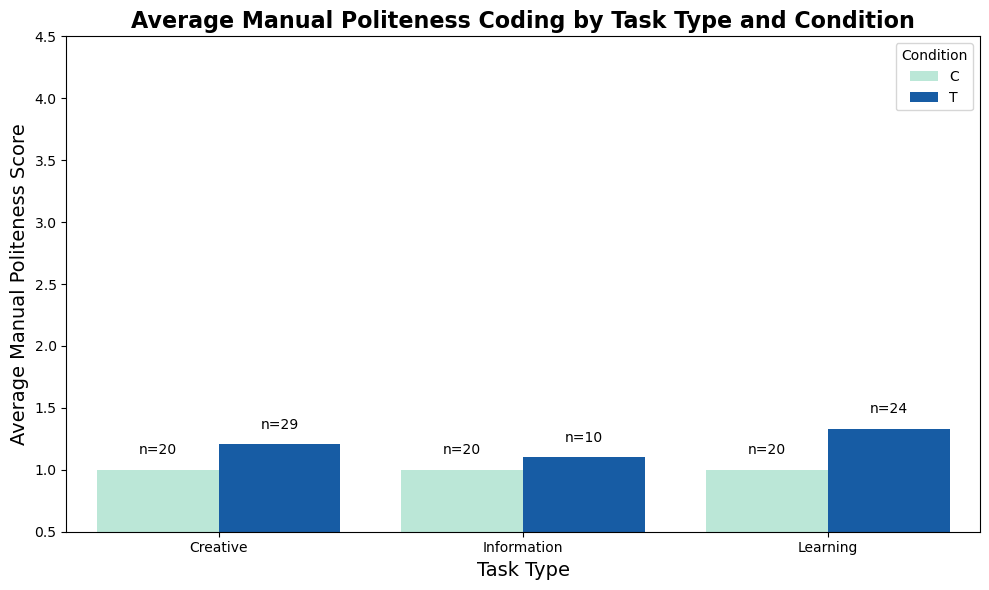

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute mean and count per task_type and Condition
summary_df = kids_df.groupby(["task_type", "Condition"])["manual_coding"].agg(['mean', 'count']).reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=summary_df,
    x="task_type",
    y="mean",
    hue="Condition",
    palette={"C": "#B3EFD9", "T": "#005BBB"}
)

# Add count annotations above each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        index = (abs(summary_df["mean"] - height) < 1e-5)  # match the bar by height
        count = summary_df[index]["count"].values[0] if any(index) else '?'
        ax.text(x, height + 0.1, f"n={count}", ha='center', va='bottom', fontsize=10)

# Format plot
ax.set_title("Average Manual Politeness Coding by Task Type and Condition", fontsize=16, weight='bold')
ax.set_xlabel("Task Type", fontsize=14)
ax.set_ylabel("Average Manual Politeness Score", fontsize=14)
ax.set_ylim(0.5, 4.5)
plt.tight_layout()
plt.show()


In [100]:
print(kids_df["Manual Coding"].describe())
print(kids_df["Manual Coding"].unique())


count    104.000000
mean       1.144231
std        0.449774
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: Manual Coding, dtype: float64
[nan  1.  2.  4.  3.]


## anova on manual coding

In [103]:
# Optional: clean column names if needed
kids_df = kids_df.rename(columns={"Manual Coding": "manual_coding"})

# Fit the model
model = ols('manual_coding ~ task_type * Condition', data=kids_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                        sum_sq    df         F    PR(>F)
task_type             0.266741   2.0  0.688202  0.504890
Condition             1.360442   1.0  7.019988  0.009398
task_type:Condition   0.169876   2.0  0.438288  0.646398
Residual             18.991954  98.0       NaN       NaN


                         sum_sq     df         F    PR(>F)
Condition              1.110469    1.0  3.011151  0.083771
task_type              1.475466    2.0  2.000440  0.137164
Condition:task_type    0.281186    2.0  0.381233  0.683365
Residual             105.472611  286.0       NaN       NaN


/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/3354245064.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby(['task_type', 'Condition'])['Manual Coding'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/3354245064.py:31: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'black'}` instead.

  sns.barplot(
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/3354245064.py:31: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(


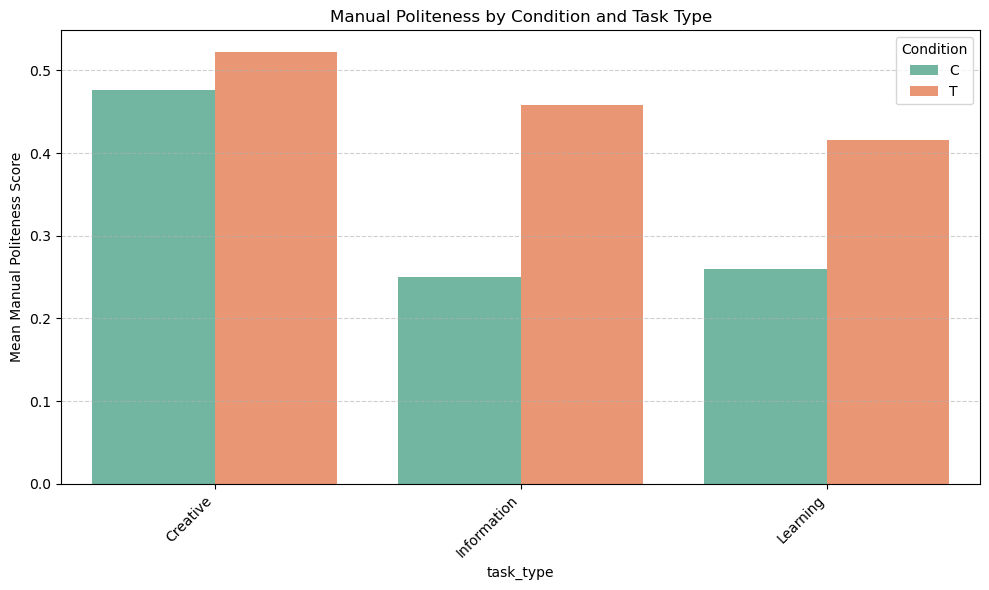

In [41]:

kids_df = filtered_df[filtered_df["speaker"] == "You"]
df = kids_df.copy()

# ✅ Drop rows with missing predictors too
df = df.dropna(subset=['Condition', 'task_type'])


import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Make sure categories are categorical types
df['Condition'] = df['Condition'].astype('category')
df['task_type'] = df['task_type'].astype('category')

# ✅ Fit the ANOVA model with interaction
model = smf.ols('Q("Manual Coding") ~ Condition * task_type', data=df).fit()

# ✅ Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # type II ANOVA
print(anova_table)
import matplotlib.pyplot as plt
import seaborn as sns

# 🧮 Compute group means and confidence intervals
group_means = df.groupby(['task_type', 'Condition'])['Manual Coding'].agg(['mean', 'count', 'std']).reset_index()
group_means['sem'] = group_means['std'] / group_means['count']**0.5  # standard error

# ✅ Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=group_means,
    x='task_type',
    y='mean',
    hue='Condition',
    palette='Set2',
    capsize=0.1,
    errcolor='black',
    errwidth=1.5
)

plt.ylabel('Mean Manual Politeness Score')
plt.xlabel('task_type')
plt.title('Manual Politeness by Condition and Task Type')
plt.xticks(rotation=45, ha='right')
#plt.ylim(0, 1)
plt.legend(title='Condition')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Bayesian statistics

## kids score

In [8]:
# Bayesian bootstrap on AI coding
import numpy as np

# Example: scores from each group (politeness scores between 0 and 1)
scores_C = kids_df[kids_df["Condition"] == "C"]["politeness_score_Genius1237/xlm-roberta-large-tydip"].values
scores_T = kids_df[kids_df["Condition"] == "T"]["politeness_score_Genius1237/xlm-roberta-large-tydip"].values

# Bayesian bootstrap
n_samples = 10000
means_T = []
means_C = []

for _ in range(n_samples):
    weights_T = np.random.dirichlet(np.ones(len(scores_T)))
    weights_C = np.random.dirichlet(np.ones(len(scores_C)))
    
    mean_T = np.sum(weights_T * scores_T)
    mean_C = np.sum(weights_C * scores_C)
    
    means_T.append(mean_T)
    means_C.append(mean_C)

delta = np.array(means_T) - np.array(means_C)
p_T_greater_C = np.mean(delta > 0)
print(f"Probability that T > C: {p_T_greater_C:.3f}")
delta_mean = np.mean(delta)
print(f"Δ = {delta_mean:.3f}")

Probability that T > C: 0.516
Δ = 0.002


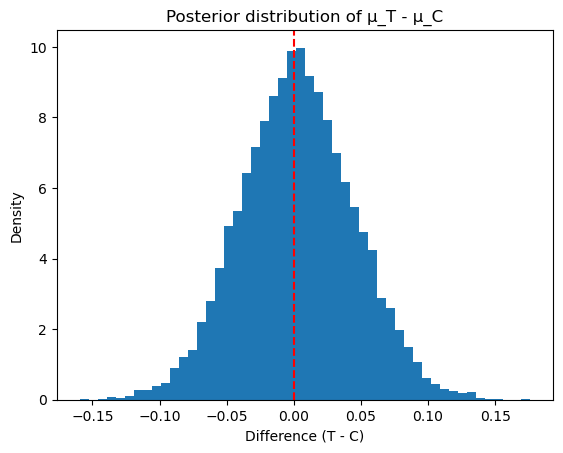

In [126]:
import matplotlib.pyplot as plt

plt.hist(delta, bins=50, density=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Posterior distribution of μ_T - μ_C')
plt.xlabel('Difference (T - C)')
plt.ylabel('Density')
plt.show()


## kids score on manual coding

In [38]:
# Bayesian bootstrap on manual coding
import numpy as np

# Example: scores from each group (politeness scores between 0 and 1)
scores_C = kids_df[kids_df["Condition"] == "C"]["Manual Coding"].values
scores_T = kids_df[kids_df["Condition"] == "T"]["Manual Coding"].values

# Bayesian bootstrap
n_samples = 10000
means_T = []
means_C = []

for _ in range(n_samples):
    weights_T = np.random.dirichlet(np.ones(len(scores_T)))
    weights_C = np.random.dirichlet(np.ones(len(scores_C)))
    
    mean_T = np.sum(weights_T * scores_T)
    mean_C = np.sum(weights_C * scores_C)
    
    means_T.append(mean_T)
    means_C.append(mean_C)

delta = np.array(means_T) - np.array(means_C)
p_T_greater_C = np.mean(delta > 0)

print(f"Probability that T > C: {p_T_greater_C:.3f}")
delta_mean = np.mean(delta)
print(f"Δ = {delta_mean:.3f}")

Probability that T > C: 0.978
Δ = 0.132


## kids manual coding no AG

In [40]:
# Bayesian bootstrap on manual coding without AG
import numpy as np

# Example: scores from each group (politeness scores between 0 and 1)
scores_C = kids_noAG_df[kids_noAG_df["Condition"] == "C"]["Manual Coding"].values
scores_T = kids_noAG_df[kids_noAG_df["Condition"] == "T"]["Manual Coding"].values

# Bayesian bootstrap
n_samples = 10000
means_T = []
means_C = []

for _ in range(n_samples):
    weights_T = np.random.dirichlet(np.ones(len(scores_T)))
    weights_C = np.random.dirichlet(np.ones(len(scores_C)))
    
    mean_T = np.sum(weights_T * scores_T)
    mean_C = np.sum(weights_C * scores_C)
    
    means_T.append(mean_T)
    means_C.append(mean_C)

delta = np.array(means_T) - np.array(means_C)
p_T_greater_C = np.mean(delta > 0)

print(f"Probability that T > C: {p_T_greater_C:.3f}")
delta_mean = np.mean(delta)
print(f"Δ = {delta_mean:.3f}")

Probability that T > C: 0.422
Δ = -0.012


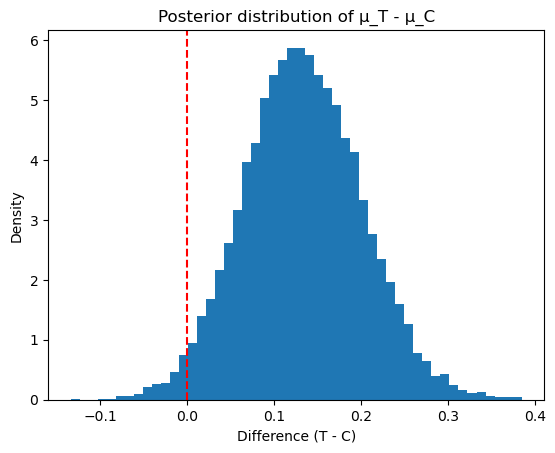

In [128]:
import matplotlib.pyplot as plt

plt.hist(delta, bins=50, density=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Posterior distribution of μ_T - μ_C')
plt.xlabel('Difference (T - C)')
plt.ylabel('Density')
plt.show()


## manual coding per task type

               comparison  probability  mean_diff
2     Creative > Learning       0.9725   0.153437
1  Information > Learning       0.4716  -0.005351
0  Information > Creative       0.0446  -0.157136


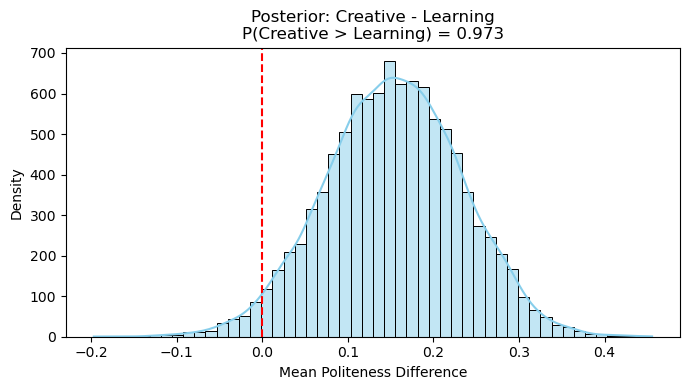

In [42]:
# Bayesian bootstrap on manual coding not per condition but per task type
import numpy as np
import pandas as pd
import itertools

# Use your DataFrame
df_bb = kids_df.copy()

#df_bb = df_bb[(df_bb['Initials'] != 'AG')]

# Drop rows with missing data
df_bb = df_bb.dropna(subset=['task_type', 'Manual Coding'])

# Get unique task types
task_types = df_bb['task_type'].unique()
n_samples = 10000

# Pairwise comparisons
results = []

for t1, t2 in itertools.combinations(task_types, 2):
    scores1 = df_bb[df_bb['task_type'] == t1]['Manual Coding'].values
    scores2 = df_bb[df_bb['task_type'] == t2]['Manual Coding'].values

    if len(scores1) == 0 or len(scores2) == 0:
        continue  # Skip empty groups

    means1 = []
    means2 = []

    for _ in range(n_samples):
        w1 = np.random.dirichlet(np.ones(len(scores1)))
        w2 = np.random.dirichlet(np.ones(len(scores2)))
        means1.append(np.sum(w1 * scores1))
        means2.append(np.sum(w2 * scores2))

    delta = np.array(means1) - np.array(means2)
    prob = np.mean(delta > 0)

    results.append({
        'comparison': f"{t1} > {t2}",
        'probability': prob,
        'mean_diff': np.mean(delta)
    })

# Show results
results_df = pd.DataFrame(results).sort_values(by='probability', ascending=False)
print(results_df)
# After calculating `delta` for each pair in your loop:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.histplot(delta, bins=50, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"Posterior: {t1} - {t2}\nP({t1} > {t2}) = {prob:.3f}")
plt.xlabel("Mean Politeness Difference")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


## manual coding per type of interaction

           comparison  probability  mean_diff
0   Question > Answer        0.969   0.148444
1  Question > Request        0.002  -0.349294
2    Answer > Request        0.000  -0.498739


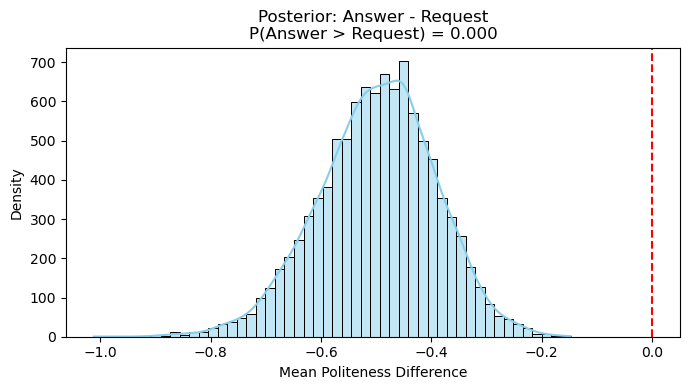

In [43]:
# Bayesian bootstrap on manual coding not per condition but per interaction type
import numpy as np
import pandas as pd
import itertools

# Use your DataFrame
df_bb = kids_df.copy()

# Drop rows with missing data
df_bb = df_bb.dropna(subset=['Type_interraction', 'Manual Coding'])

# Get unique task types
task_types = df_bb['Type_interraction'].unique()
n_samples = 10000

# Pairwise comparisons
results = []

for t1, t2 in itertools.combinations(task_types, 2):
    scores1 = df_bb[df_bb['Type_interraction'] == t1]['Manual Coding'].values
    scores2 = df_bb[df_bb['Type_interraction'] == t2]['Manual Coding'].values

    if len(scores1) == 0 or len(scores2) == 0:
        continue  # Skip empty groups

    means1 = []
    means2 = []

    for _ in range(n_samples):
        w1 = np.random.dirichlet(np.ones(len(scores1)))
        w2 = np.random.dirichlet(np.ones(len(scores2)))
        means1.append(np.sum(w1 * scores1))
        means2.append(np.sum(w2 * scores2))

    delta = np.array(means1) - np.array(means2)
    prob = np.mean(delta > 0)

    results.append({
        'comparison': f"{t1} > {t2}",
        'probability': prob,
        'mean_diff': np.mean(delta)
    })

# Show results
results_df = pd.DataFrame(results).sort_values(by='probability', ascending=False)
print(results_df)
# After calculating `delta` for each pair in your loop:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.histplot(delta, bins=50, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"Posterior: {t1} - {t2}\nP({t1} > {t2}) = {prob:.3f}")
plt.xlabel("Mean Politeness Difference")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


## AI coding on type of interaction

           comparison  probability  mean_diff
2    Answer > Request       0.0001  -0.179411
0   Question > Answer       0.0000  -0.324126
1  Question > Request       0.0000  -0.503200


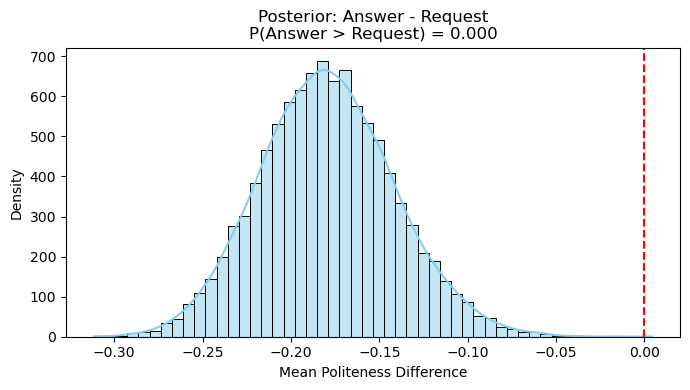

In [44]:
# Bayesian bootstrap on AI coding not per condition but per interaction type
import numpy as np
import pandas as pd
import itertools

# Use your DataFrame
df_bb = kids_df.copy()

#df_bb = df_bb[(df_bb['Initials'] != 'AG')]

# Drop rows with missing data
df_bb = df_bb.dropna(subset=['Type_interraction', 'politeness_score_Genius1237/xlm-roberta-large-tydip'])

# Get unique task types
task_types = df_bb['Type_interraction'].unique()
n_samples = 10000

# Pairwise comparisons
results = []

for t1, t2 in itertools.combinations(task_types, 2):
    scores1 = df_bb[df_bb['Type_interraction'] == t1]['politeness_score_Genius1237/xlm-roberta-large-tydip'].values
    scores2 = df_bb[df_bb['Type_interraction'] == t2]['politeness_score_Genius1237/xlm-roberta-large-tydip'].values

    if len(scores1) == 0 or len(scores2) == 0:
        continue  # Skip empty groups

    means1 = []
    means2 = []

    for _ in range(n_samples):
        w1 = np.random.dirichlet(np.ones(len(scores1)))
        w2 = np.random.dirichlet(np.ones(len(scores2)))
        means1.append(np.sum(w1 * scores1))
        means2.append(np.sum(w2 * scores2))

    delta = np.array(means1) - np.array(means2)
    prob = np.mean(delta > 0)

    results.append({
        'comparison': f"{t1} > {t2}",
        'probability': prob,
        'mean_diff': np.mean(delta)
    })

# Show results
results_df = pd.DataFrame(results).sort_values(by='probability', ascending=False)
print(results_df)
# After calculating `delta` for each pair in your loop:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.histplot(delta, bins=50, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"Posterior: {t1} - {t2}\nP({t1} > {t2}) = {prob:.3f}")
plt.xlabel("Mean Politeness Difference")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


# Correlation politeness AI bot vs child

## on AI coding

In [130]:
# Correlation politeness AI bot vs child
# Group by interaction and speaker, compute mean politeness score

grouped = filtered_df.groupby(['interaction_number', 'speaker'])['politeness_score_Genius1237/xlm-roberta-large-tydip'].mean().unstack()

# Drop any interactions missing one speaker
grouped = grouped.dropna(subset=['You', 'ChatGPT'])

# Compute correlation
from scipy.stats import pearsonr, spearmanr

pearson_corr, p_pearson = pearsonr(grouped['You'], grouped['ChatGPT'])
spearman_corr, p_spearman = spearmanr(grouped['You'], grouped['ChatGPT'])

print(f"Pearson correlation (mean politeness per interaction): r = {pearson_corr:.3f} (p = {p_pearson:.3f})")
print(f"Spearman correlation: ρ = {spearman_corr:.3f} (p = {p_spearman:.3f})")


Pearson correlation (mean politeness per interaction): r = -0.054 (p = 0.742)
Spearman correlation: ρ = -0.019 (p = 0.906)


## on manual coding for kids

In [131]:
# correlation politeness AI bot vs manually coded child politeness
# Rename for clarity
df = filtered_df.copy()

# Replace with your actual manual coding column name
manual_col = 'Manual Coding'  # or your actual column name for manual politeness score

# Subset to relevant speakers and scores
df_child = df[df['speaker'] == 'You'][['interaction_number', manual_col]].groupby('interaction_number').mean()
df_chatgpt = df[df['speaker'] == 'ChatGPT'][['interaction_number', 'politeness_score_Genius1237/xlm-roberta-large-tydip']].groupby('interaction_number').mean()

# Rename columns
df_child = df_child.rename(columns={manual_col: 'child_manual_score'})
df_chatgpt = df_chatgpt.rename(columns={'politeness_score_Genius1237/xlm-roberta-large-tydip': 'chatgpt_ai_score'})

# Merge into single table
df_merged = pd.merge(df_child, df_chatgpt, left_index=True, right_index=True)

from scipy.stats import pearsonr, spearmanr

# Pearson and Spearman
pearson_corr, pearson_p = pearsonr(df_merged['child_manual_score'], df_merged['chatgpt_ai_score'])
spearman_corr, spearman_p = spearmanr(df_merged['child_manual_score'], df_merged['chatgpt_ai_score'])

print(f"Pearson r = {pearson_corr:.3f} (p = {pearson_p:.3f})")
print(f"Spearman ρ = {spearman_corr:.3f} (p = {spearman_p:.3f})")


Pearson r = -0.122 (p = 0.452)
Spearman ρ = -0.212 (p = 0.190)


## graph

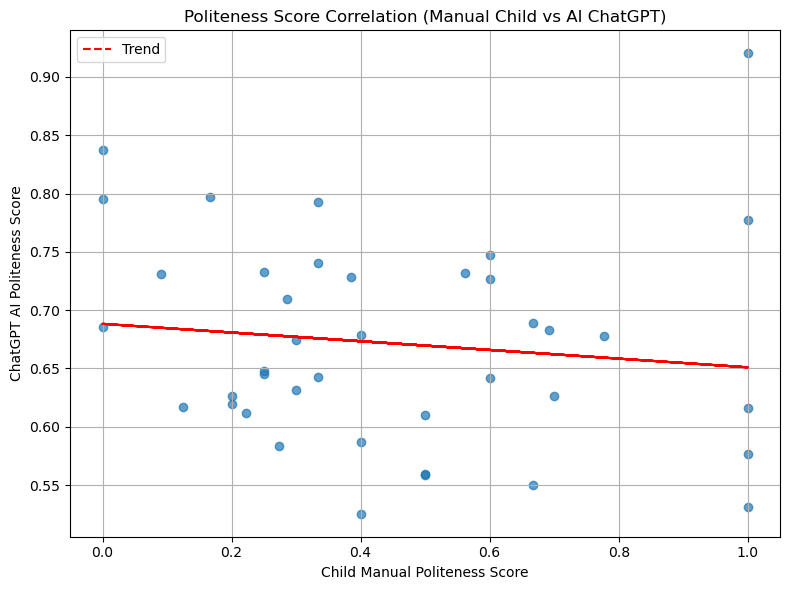

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_merged['child_manual_score'], df_merged['chatgpt_ai_score'], alpha=0.7)
plt.xlabel("Child Manual Politeness Score")
plt.ylabel("ChatGPT AI Politeness Score")
plt.title("Politeness Score Correlation (Manual Child vs AI ChatGPT)")
plt.grid(True)

# Optional: add regression line
import numpy as np
z = np.polyfit(df_merged['child_manual_score'], df_merged['chatgpt_ai_score'], 1)
p = np.poly1d(z)
plt.plot(df_merged['child_manual_score'], p(df_merged['child_manual_score']), "r--", label="Trend")
plt.legend()

plt.tight_layout()
plt.show()


In [135]:
!pip install pymc

  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.1 MB/s eta 0:00:00
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 150.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.4 MB/s eta 0:00:00
  Created wheel for cons: filename=cons-0.4.6-py3-none-any.whl size=9096 sha256=4f6b3a2b9d872ad39a441e9f5ed7145c6a3f93a5d4623f2a4d0ea7a11e412eb5
  Stored in directory: /Users/olga/Library/Caches/pip/wheels/91/0c/f7/7ba4ffbf0db6bf272bee59789131f6ec2d26966307a3054267
  Created wheel for logical-unification: filename=logical_unification-0.4.6-py3-none-any.whl size=13912 sha256=37457c500f3bd58fc3d2a25acf64cc1ab6f4d2813cbe6177f90761a7471334fa
  Stored in directory: /Users/olga/Libra

# type of interaction

## Manual politeness graph per interation and condition

                                sum_sq     df         F    PR(>F)
Condition                     0.003837    1.0  0.016516  0.897855
Type_interraction             2.064277    2.0  4.442219  0.012792
Condition:Type_interraction   0.237988    2.0  0.512138  0.599892
Residual                     53.672257  231.0       NaN       NaN


/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_92663/1133405832.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby(['Type_interraction', 'Condition'])['Manual Coding'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_92663/1133405832.py:34: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'black'}` instead.

  sns.barplot(
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_92663/1133405832.py:34: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(


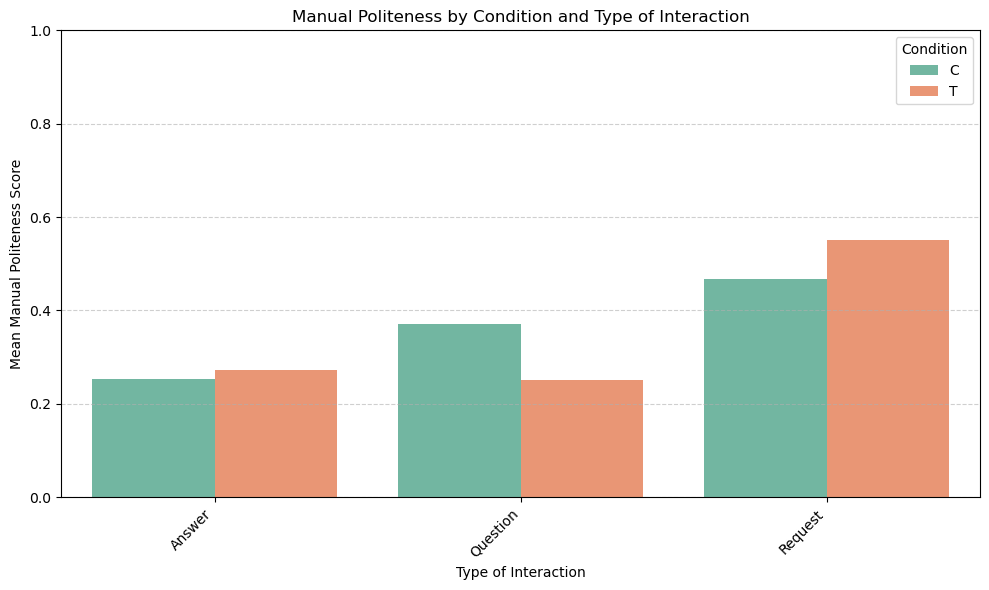

In [171]:
# baysian interaction of condition and type of interaction

# 🧹 Clean + filter rows with valid scores, all in one go
df = kids_df.copy()

# ✅ Drop rows with missing predictors too
df = df.dropna(subset=['Condition', 'Type_interraction'])


import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Make sure categories are categorical types
df['Condition'] = df['Condition'].astype('category')
df['Type_interraction'] = df['Type_interraction'].astype('category')

# ✅ Fit the ANOVA model with interaction
model = smf.ols('Q("Manual Coding") ~ Condition * Type_interraction', data=df).fit()

# ✅ Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # type II ANOVA
print(anova_table)
import matplotlib.pyplot as plt
import seaborn as sns

# 🧮 Compute group means and confidence intervals
group_means = df.groupby(['Type_interraction', 'Condition'])['Manual Coding'].agg(['mean', 'count', 'std']).reset_index()
group_means['sem'] = group_means['std'] / group_means['count']**0.5  # standard error

# ✅ Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=group_means,
    x='Type_interraction',
    y='mean',
    hue='Condition',
    palette='Set2',
    capsize=0.1,
    errcolor='black',
    errwidth=1.5
)

plt.ylabel('Mean Manual Politeness Score')
plt.xlabel('Type of Interaction')
plt.title('Manual Politeness by Condition and Type of Interaction')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend(title='Condition')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## graph comparing manual vs AI coding

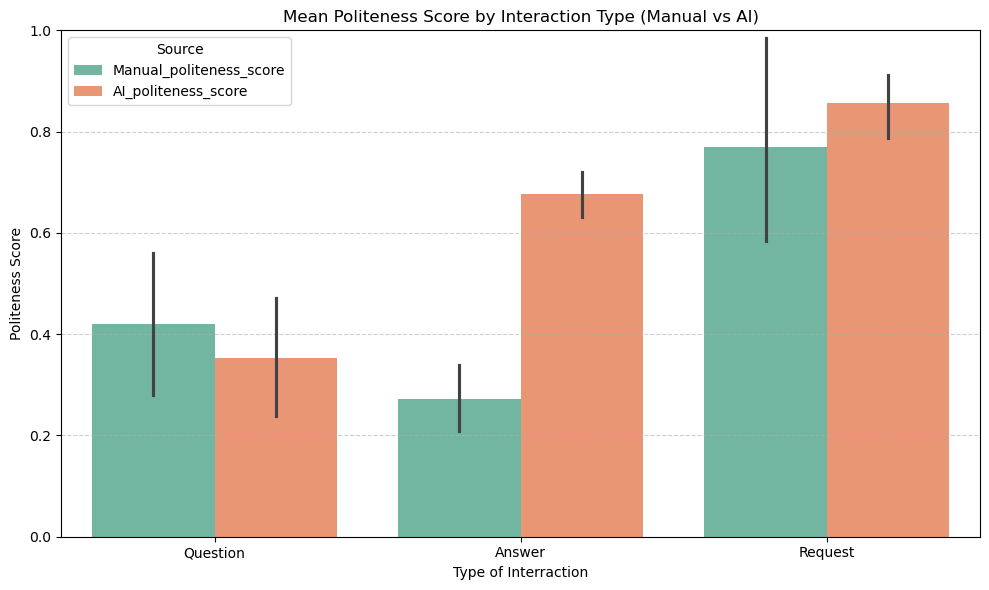

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Prepare data ---
# Melt the data to long format
df_plot = kids_df[['Type_interraction', 'Manual Coding', 'politeness_score_Genius1237/xlm-roberta-large-tydip']].copy()
df_plot = df_plot.dropna()
df_plot = df_plot.rename(columns={
    'politeness_score_Genius1237/xlm-roberta-large-tydip': 'AI_politeness_score',
    'Manual Coding': 'Manual_politeness_score'
})


df_long = pd.melt(
    df_plot,
    id_vars='Type_interraction',
    value_vars=['Manual_politeness_score', 'AI_politeness_score'],
    var_name='Source',
    value_name='Politeness'
)

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_long,
    x='Type_interraction',
    y='Politeness',
    hue='Source',
    palette='Set2',
)
plt.title('Mean Politeness Score by Interaction Type (Manual vs AI)')
plt.ylim(0, 1)
plt.ylabel('Politeness Score')
plt.xlabel('Type of Interraction')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Source')
plt.tight_layout()
plt.show()


# Manual vs AI coding

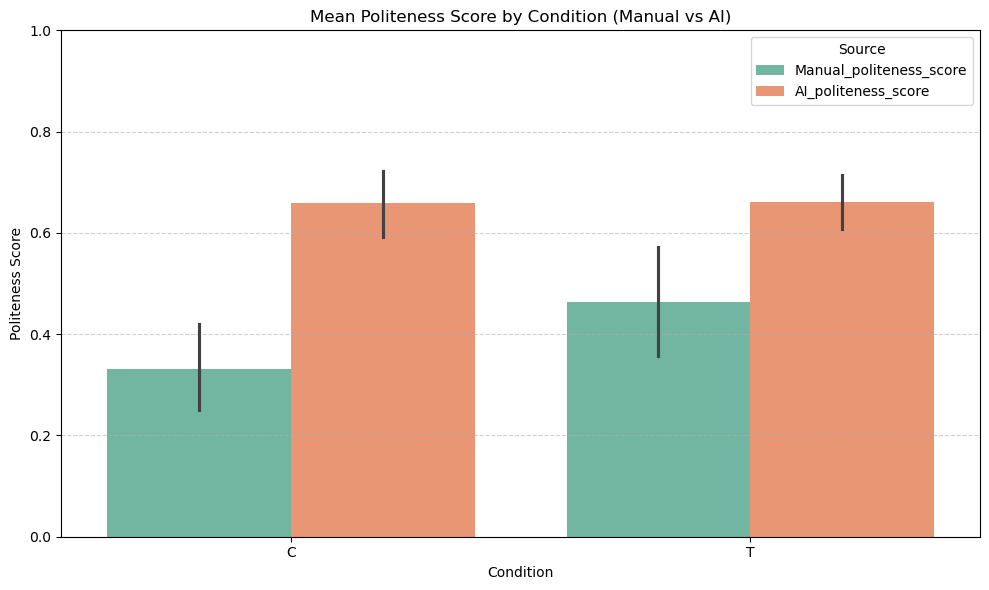

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Prepare data ---
# Melt the data to long format
kids_df = filtered_df[filtered_df["speaker"] == "You"]
df=kids_df.copy()
#df = df[(df['Initials'] != 'AG')]

df_plot = df[['Condition', 'Manual Coding', 'politeness_score_Genius1237/xlm-roberta-large-tydip']].copy()
df_plot = df_plot.dropna()
df_plot = df_plot.rename(columns={
    'politeness_score_Genius1237/xlm-roberta-large-tydip': 'AI_politeness_score',
    'Manual Coding': 'Manual_politeness_score'
})


df_long = pd.melt(
    df_plot,
    id_vars='Condition',
    value_vars=['Manual_politeness_score', 'AI_politeness_score'],
    var_name='Source',
    value_name='Politeness'
)

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_long,
    x='Condition',
    y='Politeness',
    hue='Source',
    palette='Set2',
)
plt.title('Mean Politeness Score by Condition (Manual vs AI)')
plt.ylim(0, 1)
plt.ylabel('Politeness Score')
plt.xlabel('Condition')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Source')
plt.tight_layout()
plt.show()


## the graph for the poster (with/out AG)

/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/1086877980.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/1086877980.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


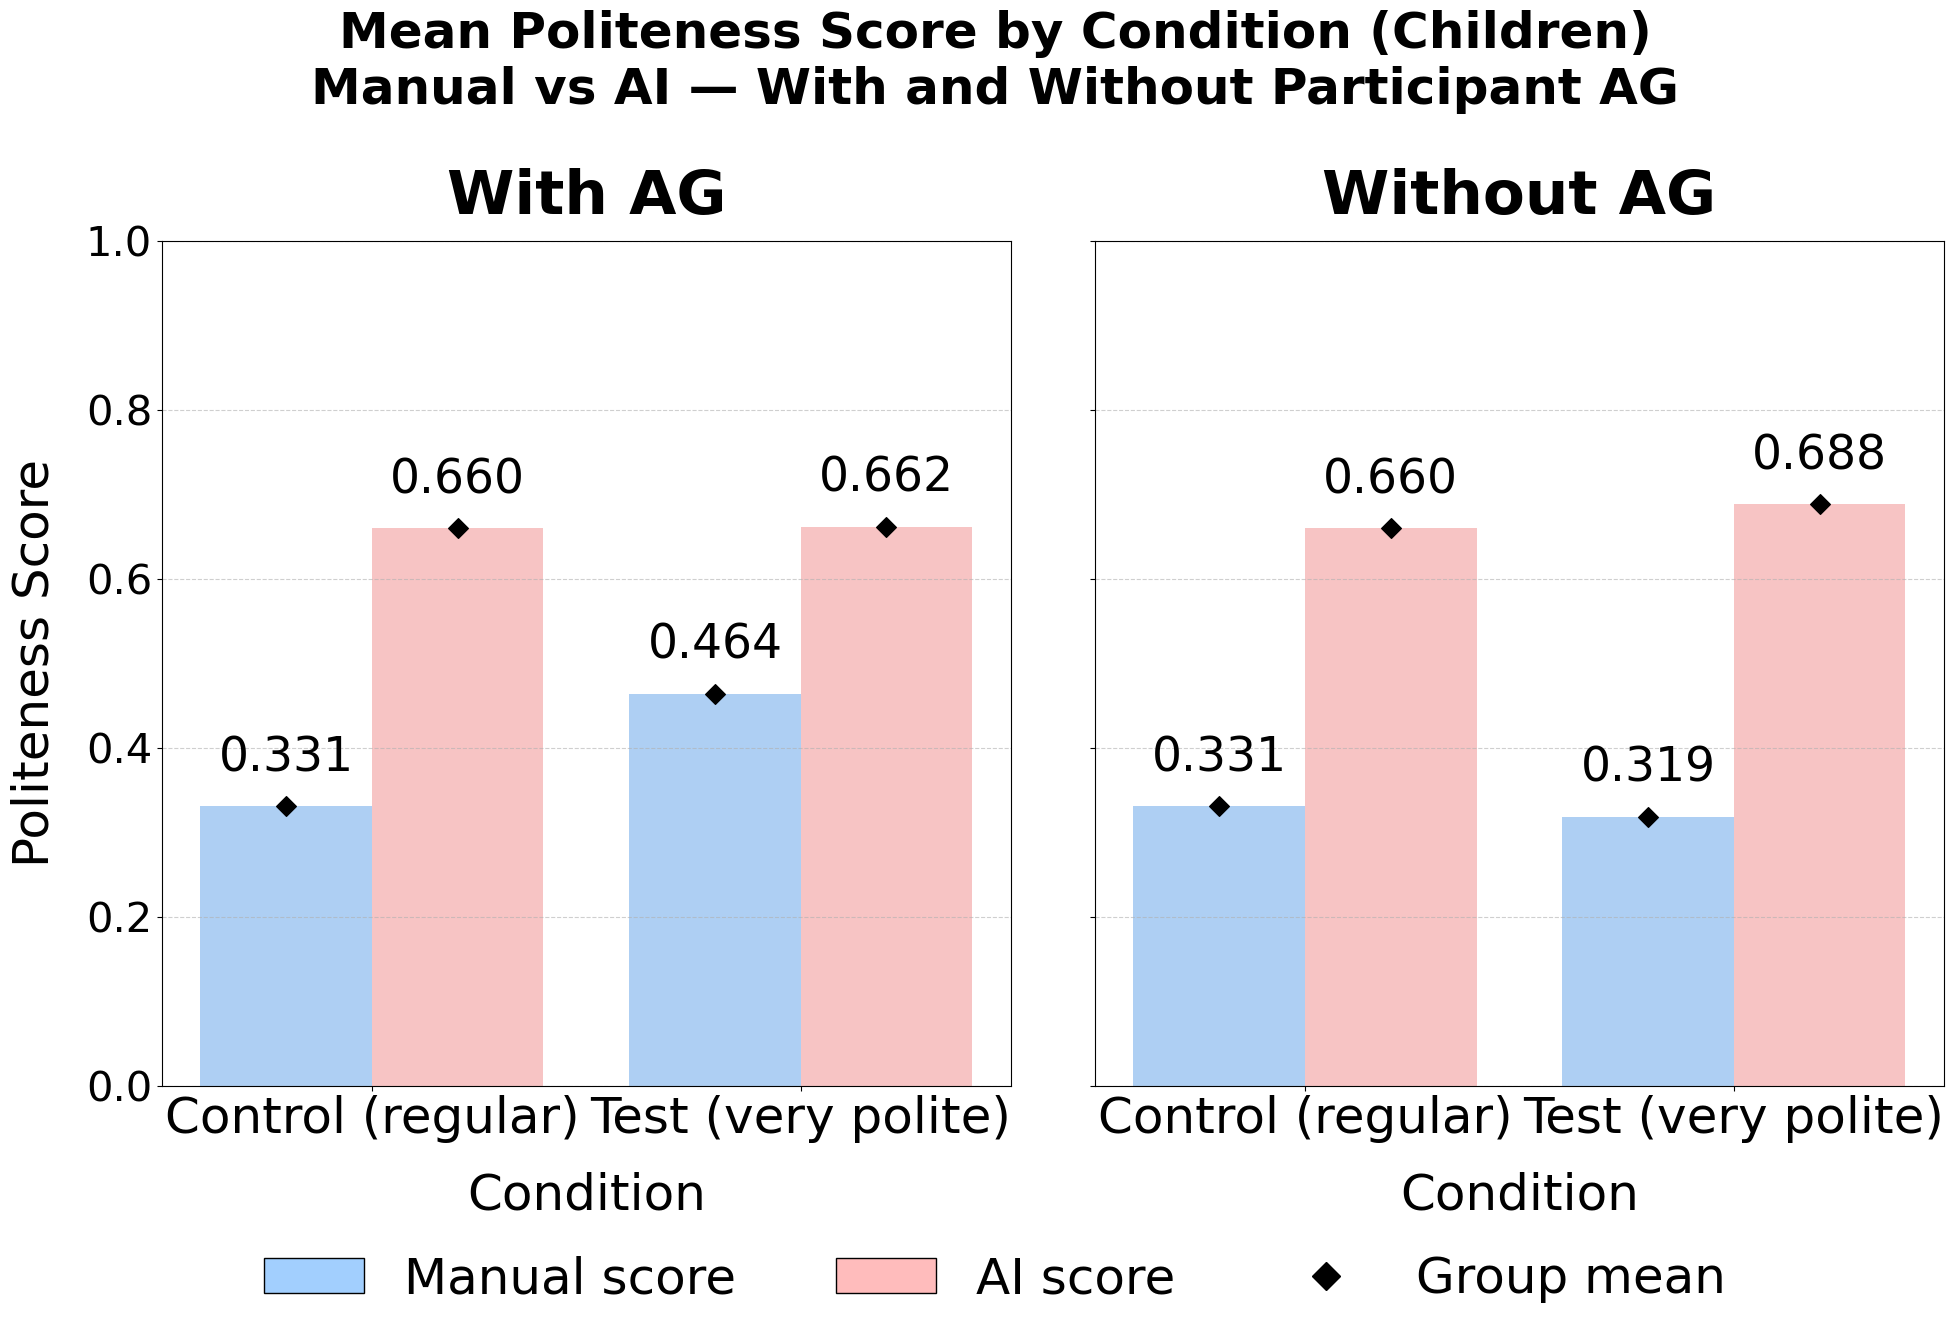

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Source data: only utterances from children
kids_df = filtered_df[filtered_df["speaker"] == "You"]

# Split with/without AG
df_with_AG = kids_df.copy()
df_without_AG = kids_df[kids_df["Initials"] != "AG"].copy()

# Function to prepare data
def prepare_long(df):
    df_plot = df[['Condition', 'Manual Coding', 'politeness_score_Genius1237/xlm-roberta-large-tydip']].copy()
    df_plot = df_plot.dropna()
    df_plot = df_plot.rename(columns={
        'politeness_score_Genius1237/xlm-roberta-large-tydip': 'AI_politeness_score',
        'Manual Coding': 'Manual_politeness_score'
    })

    df_long = pd.melt(
        df_plot,
        id_vars='Condition',
        value_vars=['Manual_politeness_score', 'AI_politeness_score'],
        var_name='Source',
        value_name='Politeness'
    )
    return df_long

df_long_with = prepare_long(df_with_AG)
df_long_without = prepare_long(df_without_AG)

# Pastel color palette for consistent style
palette = {
    'Manual_politeness_score': '#A2CFFE',  # mint pastel #A2CFFE, #B3EFD9
    'AI_politeness_score': '#FFBCBC',      # coral pastel
}
#custom_palette = {"C": "#B3EFD9", "T": "#005BBB"}
# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharey=True)

titles = ["With AG", "Without AG"]
dataframes = [df_long_with, df_long_without]

for ax, df_long, title in zip(axes, dataframes, titles):
    sns.barplot(
        data=df_long,
        x='Condition',
        y='Politeness',
        hue='Source',
        palette=palette,
        ci=None,
        ax=ax
    )

    # Add mean markers and labels
    means = df_long.groupby(['Condition', 'Source'])['Politeness'].mean().reset_index()
    for _, row in means.iterrows():
        x = ["C", "T"].index(row['Condition']) + (-0.2 if row['Source'] == 'Manual_politeness_score' else 0.2)
        ax.scatter(x, row['Politeness'], color='black', marker='D', s=100, zorder=5)
        ax.text(x, row['Politeness'] + 0.03, f"{row['Politeness']:.3f}",
                ha='center', va='bottom', fontsize=34, color='black')

    ax.set_title(f"{title}", fontsize=44, weight='bold', pad=20)
    ax.set_xlabel("Condition", fontsize=36, labelpad=20)
    ax.set_ylabel("Politeness Score", fontsize=36, labelpad=20)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Control (regular)", "Test (very polite)"], fontsize=36)
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([f"{y:.1f}" for y in ax.get_yticks()], fontsize=30)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend().remove()

# Custom legend (shared)
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='#A2CFFE', edgecolor='k', label='Manual score'),
    Patch(facecolor='#FFBCBC', edgecolor='k', label='AI score'),
    plt.Line2D([0], [0], marker='D', color='black', label='Group mean', markersize=14, linestyle='None')
]

fig.legend(
    handles=legend_elements,
    fontsize=36,
    loc='upper center',
    bbox_to_anchor=(0.5, +0.02),
    ncol=3,
    frameon=False
)

plt.suptitle("Mean Politeness Score by Condition (Children)\nManual vs AI — With and Without Participant AG", fontsize=36, weight='bold', y=1.02)
plt.tight_layout()
plt.show()


# Appreciation

## graph

/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/188075018.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
/var/folders/q5/pk7qj5ls4j742f50_1901z000000gq/T/ipykernel_832/188075018.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


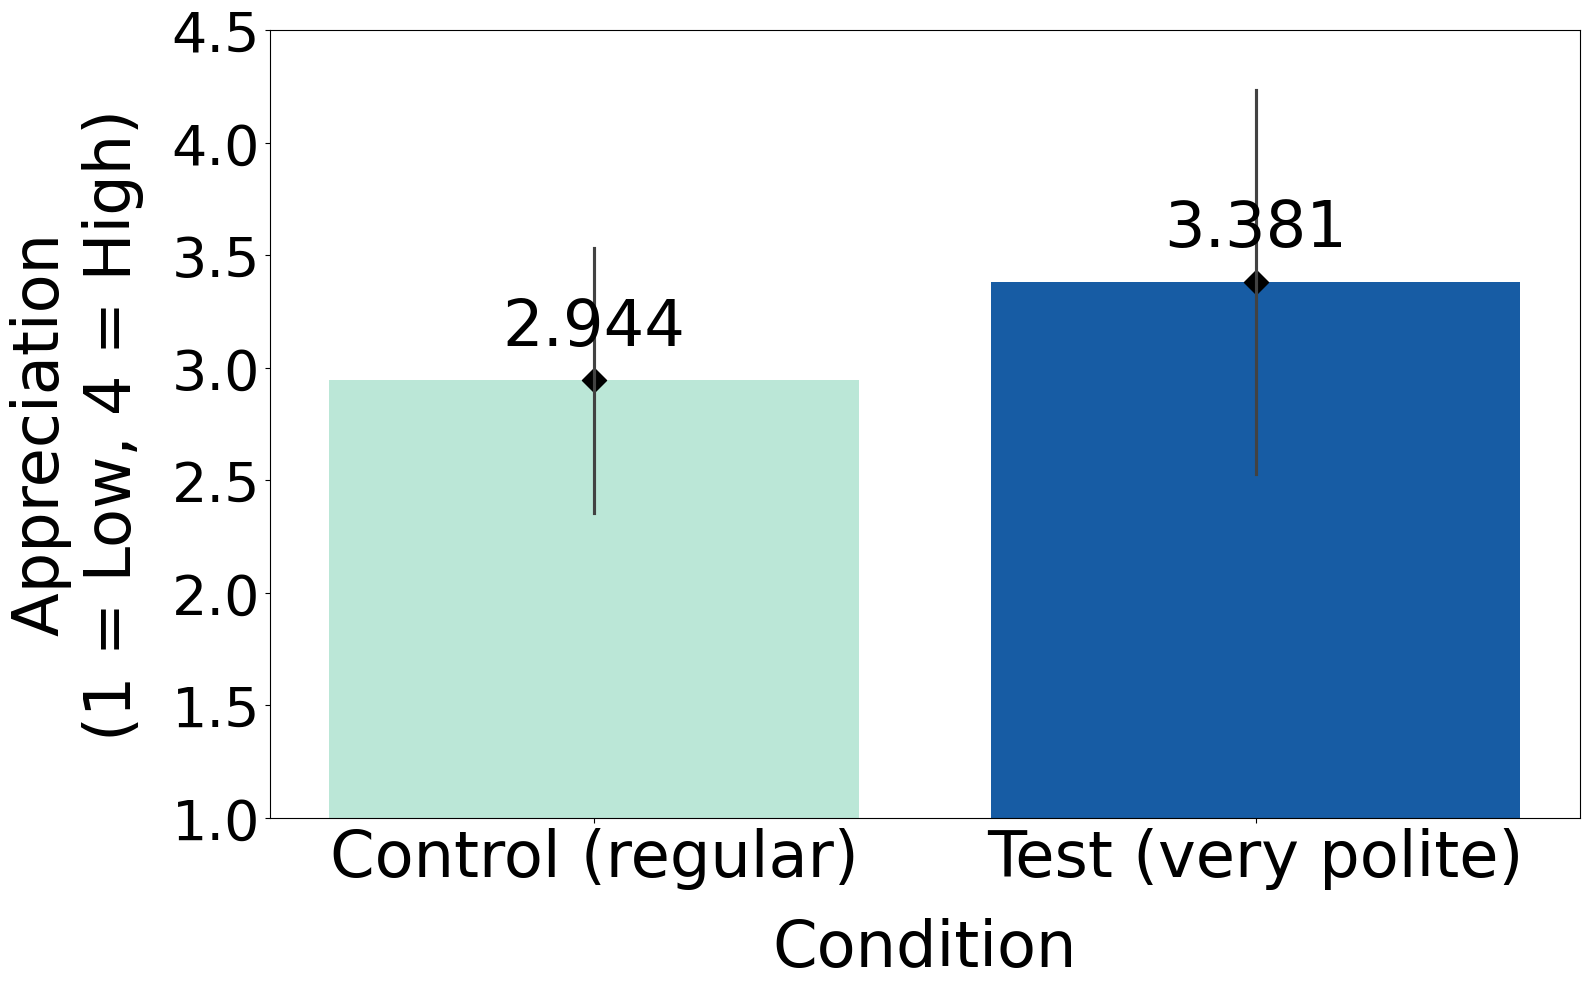

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from matplotlib.patches import Patch

# Data: only children's responses
kids_df = filtered_df[filtered_df["speaker"] == "You"]

# Define custom colors
custom_palette = {"C": "#B3EFD9", "T": "#005BBB"}  # Light blue = Control, Dark blue = Test

# Prepare figure
plt.figure(figsize=(16, 10))

# Bar plot with condition-based colors
ax = sns.barplot(
    data=kids_df,
    x="Condition",
    y="Appreciation",
    palette=custom_palette,
    order=["C", "T"],
    ci='sd'
)

# Overlay group means
group_means = kids_df.groupby("Condition")["Appreciation"].mean()
for i, condition in enumerate(["C", "T"]):
    mean_val = group_means[condition]
    plt.scatter(i, mean_val, color='black', marker='D', s=150, label='Group mean' if i == 0 else "")
    plt.text(i, mean_val + 0.1, f"{mean_val:.3f}", ha='center', va='bottom', fontsize=46, color='black')

# Mann–Whitney U test
scores_C = kids_df[kids_df["Condition"] == "C"]["Appreciation"]
scores_T = kids_df[kids_df["Condition"] == "T"]["Appreciation"]

if len(scores_C) > 0 and len(scores_T) > 0:
    stat, p = mannwhitneyu(scores_C, scores_T, alternative='two-sided')
    p_text = f"p = {p:.3f}" if p >= 0.001 else "p < .001"
else:
    p_text = "n/a"

# Annotate p-value
#plt.text(0.5, max(kids_df["Appreciation"]) + 0.3, p_text,
 #        ha='center', va='bottom', fontsize=36, weight='bold')

# Styling
#plt.title("Appreciation by Condition (Children)", fontsize=50, weight='bold', pad=40)
plt.xlabel("Condition", fontsize=46, labelpad=20)
plt.ylabel("Appreciation \n(1 = Low, 4 = High)", fontsize=46, labelpad=20)
plt.xticks([0, 1], ["Control (regular)", "Test (very polite)"], fontsize=46)
plt.yticks(fontsize=40)
plt.ylim(1, 4.5)

# Custom legend
legend_elements = [
    Patch(facecolor="#B3EFD9", edgecolor='k', label='Control (regular)'),
    Patch(facecolor="#005BBB", edgecolor='k', label='Test (very polite)'),
    plt.Line2D([0], [0], marker='D', color='black', label='Group mean', markersize=14, linestyle='None')
]
#plt.legend(
 #   handles=legend_elements,
  #  fontsize=38,
  #  loc='upper center',
   # bbox_to_anchor=(0.5, -0.15),
   # ncol=3,
   # frameon=False
#)

plt.tight_layout()
plt.show()


## Bayesian bootstrap on appreciation

In [49]:
# Bayesian bootstrap on appreciation
import numpy as np

scores_C = kids_df[kids_df["Condition"] == "C"]["Appreciation"].values
scores_T = kids_df[kids_df["Condition"] == "T"]["Appreciation"].values

# Bayesian bootstrap
n_samples = 10000
means_T = []
means_C = []

for _ in range(n_samples):
    weights_T = np.random.dirichlet(np.ones(len(scores_T)))
    weights_C = np.random.dirichlet(np.ones(len(scores_C)))
    
    mean_T = np.sum(weights_T * scores_T)
    mean_C = np.sum(weights_C * scores_C)
    
    means_T.append(mean_T)
    means_C.append(mean_C)

delta = np.array(means_T) - np.array(means_C)
p_T_greater_C = np.mean(delta > 0)
print(f"Probability that T > C: {p_T_greater_C:.3f}")
delta_mean = np.mean(delta)
print(f"Δ = {delta_mean:.3f}")

Probability that T > C: 1.000
Δ = 0.436


# Graph politeness per Type interaction and freq of interactions per task type

## version 1

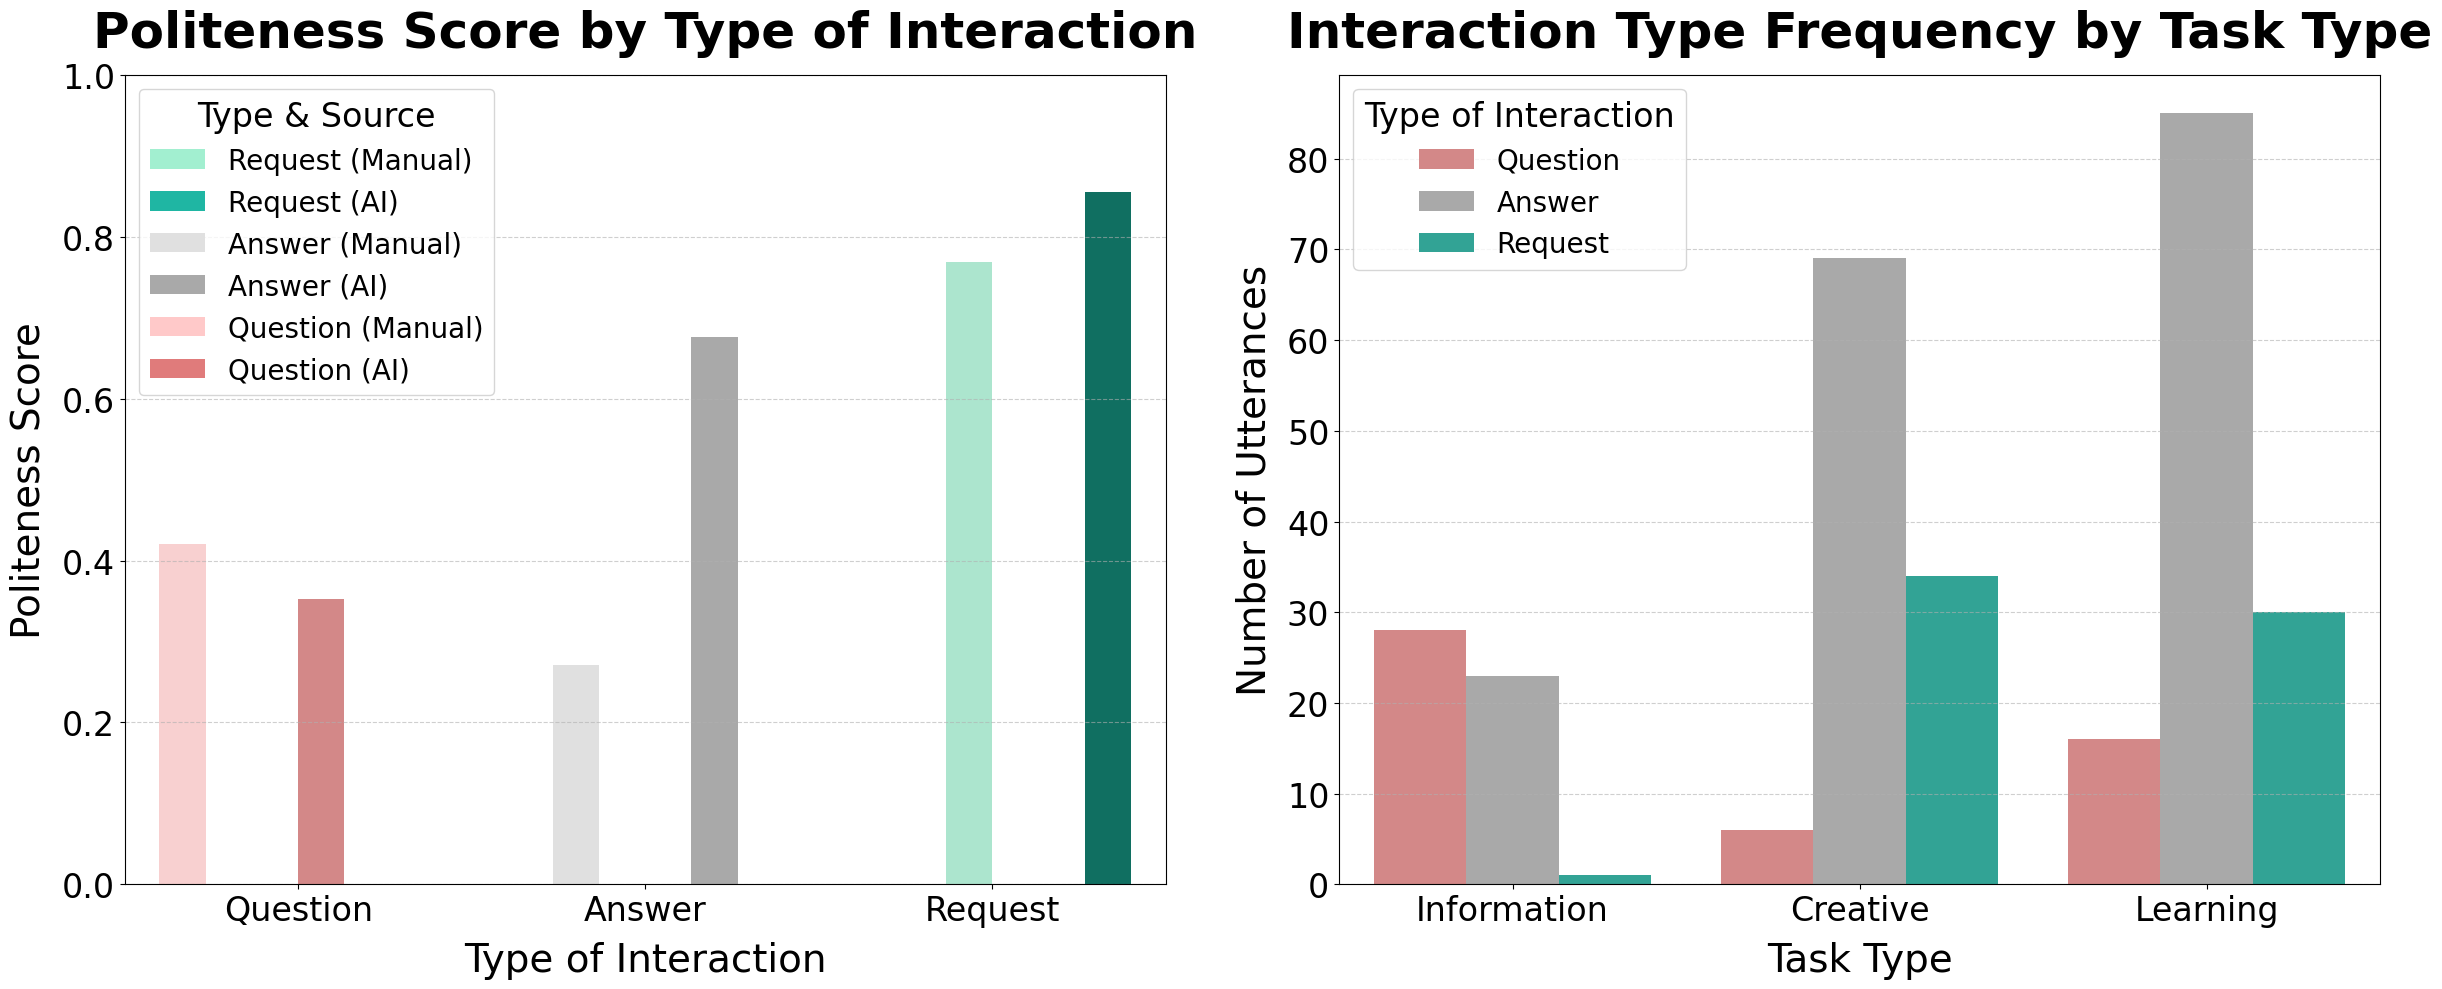

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Subset and clean
kids_df = filtered_df[filtered_df["speaker"] == "You"].copy()
kids_df = kids_df.rename(columns={
    'Manual Coding': 'Manual_politeness_score',
    'politeness_score_Genius1237/xlm-roberta-large-tydip': 'AI_politeness_score'
})
kids_df = kids_df.dropna(subset=['Manual_politeness_score', 'AI_politeness_score', 'Type_interraction', 'task_type'])

# Melt for politeness subplot
df_long = pd.melt(
    kids_df,
    id_vars='Type_interraction',
    value_vars=['Manual_politeness_score', 'AI_politeness_score'],
    var_name='Source',
    value_name='Politeness'
)

# Color mapping
color_map = {
    ('Request', 'Manual_politeness_score'): '#A2EFD0',  # light turquoise
    ('Request', 'AI_politeness_score'):     '#1FB6A3',  # dark turquoise
    ('Answer',  'Manual_politeness_score'): '#E0E0E0',  # light gray
    ('Answer',  'AI_politeness_score'):     '#A9A9A9',  # medium gray
    ('Question','Manual_politeness_score'): '#FFC9C9',  # light salmon
    ('Question','AI_politeness_score'):     '#E07B7B',  # dark salmon
}

custom_palette = {
    'Request_Manual_politeness_score': '#A2EFD0',
    'Request_AI_politeness_score': '#007F6C',
    'Answer_Manual_politeness_score': '#E0E0E0',
    'Answer_AI_politeness_score': '#A9A9A9',
    'Question_Manual_politeness_score': '#FFC9C9',
    'Question_AI_politeness_score': '#E07B7B',
}

# Set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), gridspec_kw={'width_ratios': [1, 1]})

df_long['combo'] = df_long['Type_interraction'] + '_' + df_long['Source']


# Plot the grouped barplot
barplot = sns.barplot(
    data=df_long,
    x='Type_interraction',
    y='Politeness',
    hue='combo',
    ax=ax1,
    errorbar=None,
    dodge=True,
    palette=custom_palette
)

# Customize subplot 1
ax1.set_title("Politeness Score by Type of Interaction", fontsize=36, weight='bold', pad=20)
ax1.set_ylabel("Politeness Score", fontsize=28, labelpad=10)
ax1.set_xlabel("Type of Interaction", fontsize=28, labelpad=10)
ax1.tick_params(axis='x', labelsize=24)
ax1.tick_params(axis='y', labelsize=24)
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Custom legend
legend_elements = [
    Patch(facecolor='#A2EFD0', label='Request (Manual)'),
    Patch(facecolor='#1FB6A3', label='Request (AI)'),
    Patch(facecolor='#E0E0E0', label='Answer (Manual)'),
    Patch(facecolor='#A9A9A9', label='Answer (AI)'),
    Patch(facecolor='#FFC9C9', label='Question (Manual)'),
    Patch(facecolor='#E07B7B', label='Question (AI)'),
]
ax1.legend(handles=legend_elements, title='Type & Source', fontsize=20, title_fontsize=24, loc='upper left')

# Subplot 2: frequency by task type
sns.countplot(
    data=kids_df,
    x='task_type',
    hue='Type_interraction',
    palette={
        'Request': '#1FB6A3',
        'Answer': '#A9A9A9',
        'Question': '#E07B7B'
    },
    ax=ax2
)
ax2.set_title("Interaction Type Frequency by Task Type", fontsize=36, weight='bold', pad=20)
ax2.set_ylabel("Number of Utterances", fontsize=28, labelpad=10)
ax2.set_xlabel("Task Type", fontsize=28, labelpad=10)
ax2.tick_params(axis='x', labelsize=24)
ax2.tick_params(axis='y', labelsize=24)
ax2.grid(axis='y', linestyle='--', alpha=0.6)
ax2.legend(title='Type of Interaction', fontsize=20, title_fontsize=24, loc='upper left')

# Final layout
plt.tight_layout(w_pad=5)
plt.show()


## version 2

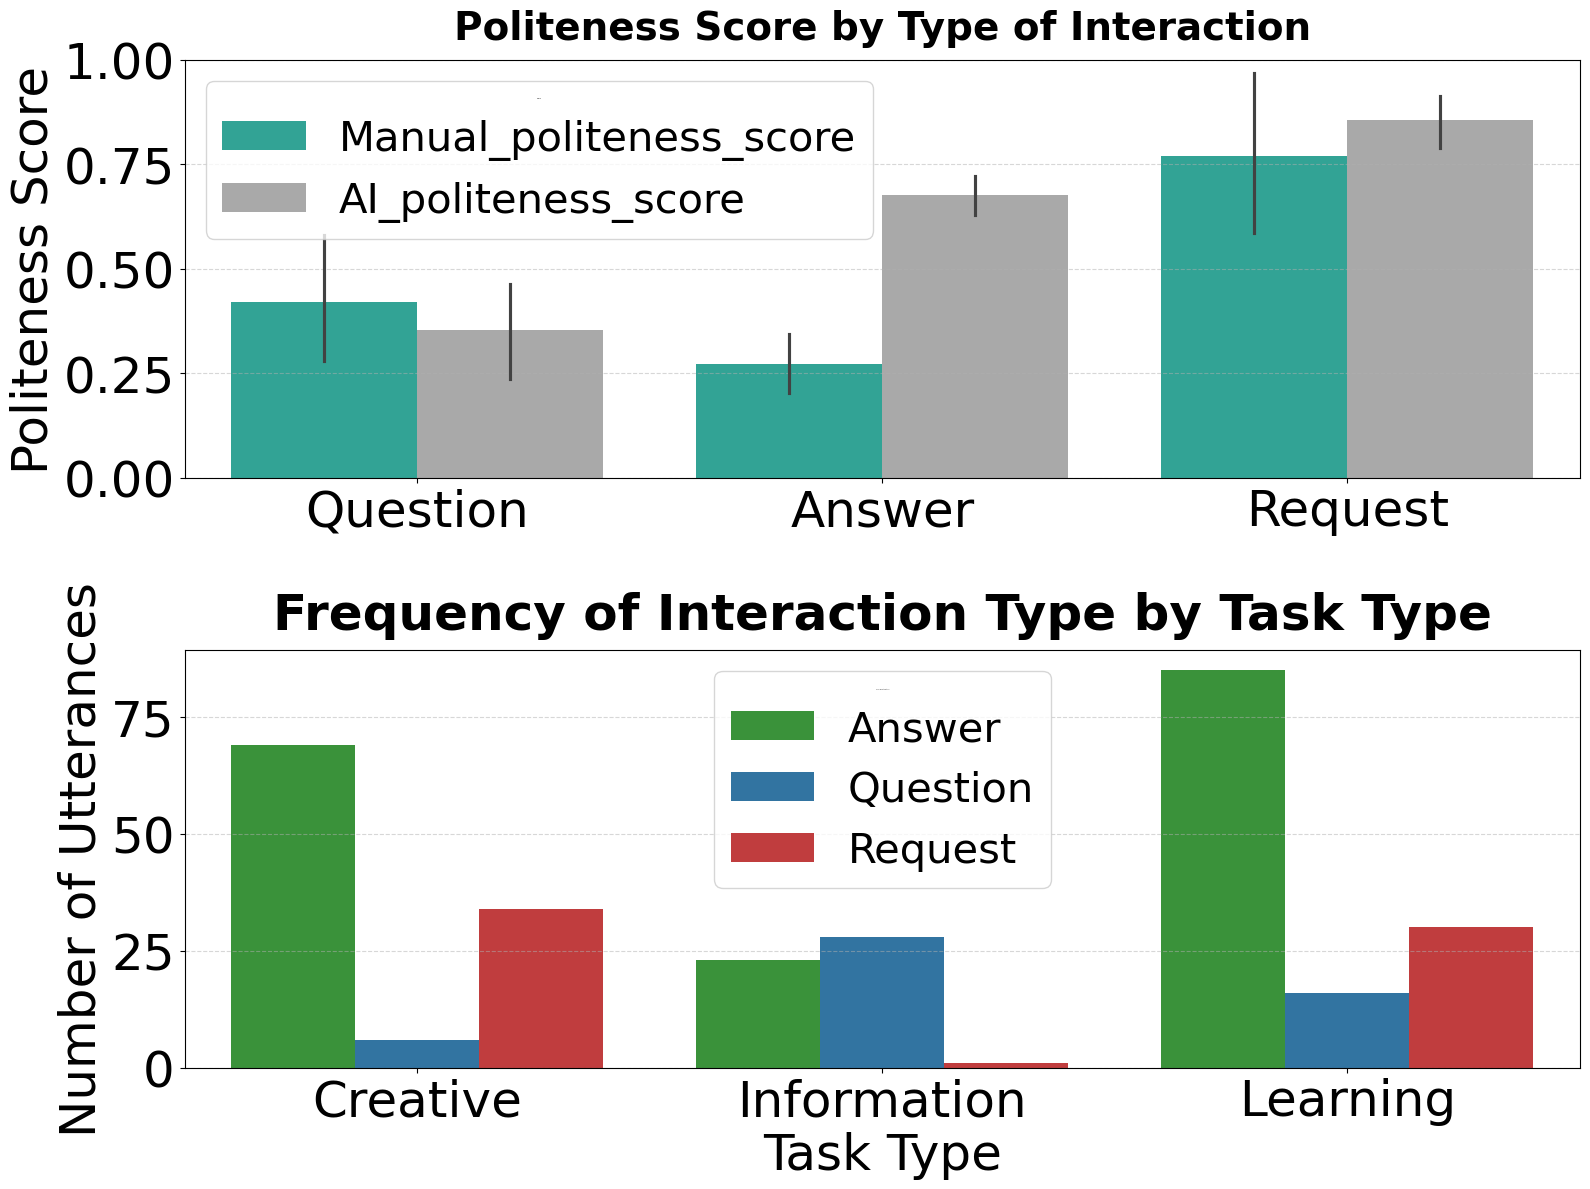

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- PREPARE DATA ---

# Politeness score (manual and AI) per type of interaction
df_long = pd.melt(
    kids_df,
    id_vars='Type_interraction',
    value_vars=['Manual_politeness_score', 'AI_politeness_score'],
    var_name='Source',
    value_name='Politeness'
)

# Frequency of interaction type per task type
freq_df = kids_df.groupby(['task_type', 'Type_interraction']).size().reset_index(name='Count')

# --- PLOT ---

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 1]})

# --- TOP PLOT: Politeness by Interaction Type ---
sns.barplot(
    data=df_long,
    x='Type_interraction',
    y='Politeness',
    hue='Source',
    palette={
        'Manual_politeness_score': '#1FB6A3',
        'AI_politeness_score': '#A9A9A9'
    },
    ax=ax1
)
ax1.set_title("Politeness Score by Type of Interaction", fontsize=28, weight='bold', pad=15)
ax1.set_ylabel("Politeness Score", fontsize=36)
ax1.set_xlabel("")
ax1.tick_params(axis='x', labelsize=36)
ax1.tick_params(axis='y', labelsize=36)
ax1.set_ylim(0, 1)
ax1.legend(title='Source', fontsize=30, title_fontsize=0, loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- BOTTOM PLOT: Frequency by Task Type ---
sns.barplot(
    data=freq_df,
    x='task_type',
    y='Count',
    hue='Type_interraction',
    palette={
        'Request': '#D62728',  # red
        'Answer': '#2CA02C',   # green
        'Question': '#1F77B4'  # blue
    },
    ax=ax2
)
ax2.set_title("Frequency of Interaction Type by Task Type", fontsize=36, weight='bold', pad=15)
ax2.set_ylabel("Number of Utterances", fontsize=36)
ax2.set_xlabel("Task Type", fontsize=36)
ax2.tick_params(axis='x', labelsize=36)
ax2.tick_params(axis='y', labelsize=36)
ax2.legend(title='Type of Interaction', fontsize=30, title_fontsize=0, loc='upper center')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Final layout
plt.tight_layout(h_pad=4)
plt.show()


## version 3

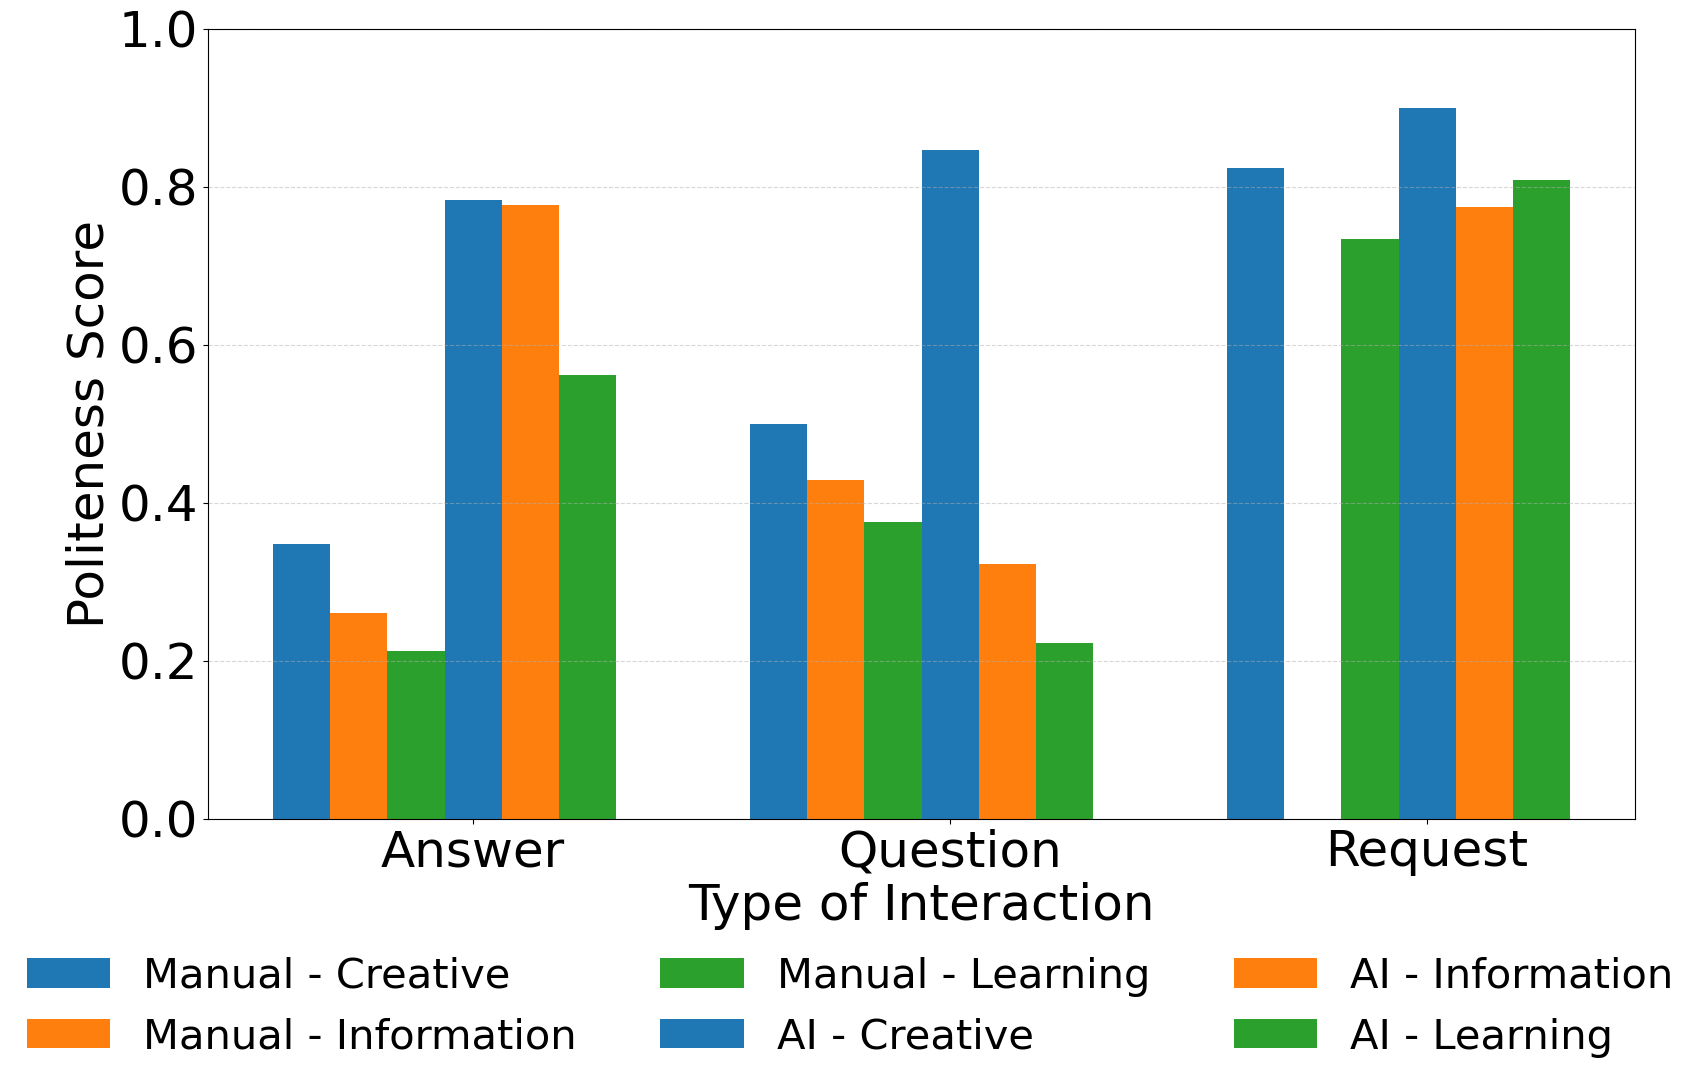

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Melt scores to long format ---
df_long = pd.melt(
    kids_df,
    id_vars=['Type_interraction', 'task_type'],
    value_vars=['Manual_politeness_score', 'AI_politeness_score'],
    var_name='Source',
    value_name='Politeness'
)

# --- Compute mean politeness by interaction type, task type, and source ---
agg_df = df_long.groupby(['Type_interraction', 'Source', 'task_type'])['Politeness'].mean().reset_index()

# --- Get unique values ---
interaction_types = sorted(agg_df['Type_interraction'].unique())
sources = ['Manual_politeness_score', 'AI_politeness_score']
task_types = sorted(agg_df['task_type'].unique())

# --- Define positions ---
n_interactions = len(interaction_types)
n_sources = len(sources)
n_tasks = len(task_types)
bar_width = 0.12
group_width = n_sources * n_tasks * bar_width
x_base = np.arange(n_interactions)

# --- Color mapping for task types ---
colors = plt.get_cmap('tab10')
task_colors = {task: colors(i) for i, task in enumerate(task_types)}

# --- Plot ---
fig, ax = plt.subplots(figsize=(16, 10))  # Taller to make space for legend

for s_idx, source in enumerate(sources):
    for t_idx, task in enumerate(task_types):
        # Filter data
        sub_df = agg_df[(agg_df['Source'] == source) & (agg_df['task_type'] == task)]
        sub_df = sub_df.set_index('Type_interraction').reindex(interaction_types)
        y_vals = sub_df['Politeness'].fillna(0).values

        # Calculate bar positions
        offsets = (s_idx * n_tasks + t_idx - group_width / (2 * bar_width)) * bar_width
        positions = x_base + offsets

        # Label each bar by Source - Task
        label = f"{source.replace('_politeness_score', '')} - {task}"
        ax.bar(
            positions,
            y_vals,
            width=bar_width,
            color=task_colors[task],
            label=label
        )

# --- Aesthetics ---
ax.set_xticks(x_base)
ax.set_xticklabels(interaction_types, fontsize=36)
ax.set_ylabel("Politeness Score", fontsize=36)
ax.set_xlabel("Type of Interaction", fontsize=36)
#ax.set_title("Politeness Scores by Interaction Type, Source, and Task Type", fontsize=40, weight='bold', pad=20)
ax.set_ylim(0, 1)
ax.tick_params(axis='y', labelsize=36)
ax.tick_params(axis='x', labelsize=36)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# --- Deduplicate and place legend under the graph ---
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
fig.legend(
    unique.values(),
    unique.keys(),
    fontsize=30,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,  # Adjust this as needed
    frameon=False
)


plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
plt.show()
